# Capstone Final Project

Disaster at St. Himark!: Voice from the People  
COMP4449: Capstone  
Adam Ten Hoeve

In [1]:
import io  # For byte processing
import re  # For parsing regular expressions
import numpy as np  # Numerical computation
import pandas as pd  # For loading and working with dataframes
from textblob import TextBlob  # For correcting misspellings and sentiment
import nltk  # For removing stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords  # For removing stopwords
from nltk.stem import WordNetLemmatizer  # For lemmatizing words
from nltk.tokenize import WhitespaceTokenizer
!pip install unidecode
import unidecode  # For removing accents from letters

from IPython.display import Image
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  
from wordcloud import WordCloud  # For creating wordclouds
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
     |████████████████████████████████| 235 kB 21.8 MB/s 


In [2]:
# For connecting the colab notebook to my google drive, where the data is stored.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Background

St. Himark is a vibrant community located in the Oceanus Sea. Home to the world-renowned St. Himark Museum, beautiful beaches, and the Wilson Forest Nature Preserve, St. Himark is one of the region’s best cities for raising a family and provides employment across a number of industries including the Always Safe Nuclear Power Plant. Well, all that was true before the disastrous earthquake that hits the area during the course of this year’s challenge. Mayor Jordan, city officials, and emergency services are overwhelmed and are desperate for assistance in understanding the true situation on the ground and how best to deploy the limited resources available to this relatively small community.

Seismic and survey data are useful for capturing the objective damage that the earthquake has caused St. Himark. However, this data has limitations. First, official surveys are time consuming and do not stay current in a rapidly changing situation. Second, they don’t establish how citizens are reacting to the current crisis. Third, they are often insufficiently granular, providing little insight into differences between neighborhoods. In other words, the seismic and survey data do not provide an up-to-date view of the structural and humanitarian impact caused by the earthquake on a neighborhood-by-neighborhood basis. The City has concluded that this knowledge is necessary to determine where to allocate emergency resources.

City Officials have identified a subset of Y* INT, a community-based social media platform, as a potential source for revealing the current state of St. Himark’s neighborhoods and people. Knowing that you are skilled in visual analytics, the City has asked you to analyze Y* INT messages in order to determine the appropriate actions it must take in order to assist the community in this disaster.

The city of St. Highmark is split into different regions. These regions are mapped below.

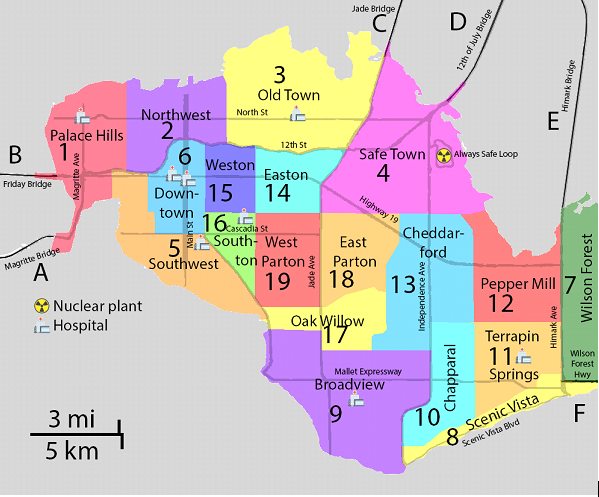

In [ ]:
Image('/content/gdrive/My Drive/data/citymap.PNG')

The city's districts are described as follows:
1.	PALACE HILLS is home to luxury condominiums and gated housing communities with private beaches. This community is known for water views, great restaurants, and waterfront parks.
2.	NORTHWEST is a growing neighborhood of upscale condominiums, modern apartment buildings, and townhouses known for their water views, good schools, and short commute to downtown St. Himark.
3.	OLD TOWN is the historic center of our city and the structures here are renowned for their decorative brickwork. Affordable housing is available in apartments and older single-family homes that are close to some of the city’s best restaurants.
4.	SAFE TOWN is a neighborhood of older single-family homes providing an easy commute to the Always Safe nuclear power plant and other local industry. Residents can live close enough to work to be able to go home for lunch! 
5.	SOUTHWEST’s mixture of light industry, single-family homes and garden apartments, and theaters provide for an environment where work, home, and play are within walking distance of each other.
6.	DOWNTOWN is the heart of the city where fast-paced business day-life and city nightlife converge. Housing is an eclectic mix of luxury lofts and modest apartments.
7.	WILSON FOREST is a developing area of new single-family homes in a beautiful, tranquil, wooded area on the edge of the Wilson Forest Nature Preserve. Life in Wilson Forest feels like you're in the country with a reasonable commute to everything the city has to offer.
8.	SCENIC VISTA has large, custom-built single-family homes to secure, gated communities, trendy apartments, and exclusive condominiums that have spectacular views from the hillside overlooking the ocean. Many of the city’s elite and powerful call Scenic Vista home.
9.	BROADVIEW’s older single-family homes known for their architectural styles and masonry construction are mixed with city parks, providing a great place to raise a family. Located off the Mallet Expressway for easy commuting into the heart of the city.
10.	CHAPPARAL’s rural lifestyle and rustic 18th and 19th century farmhouses accommodate those who want the acreage to raise livestock and still live close to the city.
11.	TERRAPIN SPRINGS mixes farm houses with newer, custom homes with lots of acreage. Terrapin Spring’s High School boasts the best farm training program in the country! 
12.	PEPPER MILL’s low-density housing, great restaurants and shopping along the water attracts tourists and locals alike.
13.	CHEDDARFORD’s quiet residential areas and slow-paced lifestyle are the perfect place for raising a family.
14.	EASTON is renowned for excellent schools and quaint single-family brick homes with manicured lawns. If your life revolves around your children, you will love living in the Easton neighborhood.
15.	WESTON is a great place to live if you work in Downtown. Cozy condos and apartment, and lofts above businesses attract college graduates and single professionals looking for an area with all the benefits of city and suburban life.
16.	SOUTHTON is a quiet neighborhood of older homes and modern garden-style apartment buildings. 
17.	OAK WILLOW is close to work, shopping and nightlife for educated couples and young single professionals. 
18.	EAST PARTON is known for its masonry facades, strong community sports programs and short commute.
19.	WEST PARTON, located in the heart of the city, is home for families looking for a short commute to work and play call. The St. Himark Museum is conveniently located in West Parton.


# Problem Statement

Can we use social media posts sent by the citizens to determine what problems occured across St. Highmark? Then, can we determine the best way to distribute emergency resources to the different neighborhoods?


# The Data

For this task, we have been given one CSV file, spanning from 04/06/2020 to 04/12/2020, which has the following fields:
- time (date/time the message was posted)
- location (St. Himark neighborhood message was posted from)
- account (user handle of the person who posted the message)
- message (text of the message itself)
	
Before we jump into coding, we should think about what we want to do with this data:
- To do proper analysis, we need to understand the structure of the data and apply appropriate cleaning methods.
- For this task, it may be important to track individual districts or users. For this, we can create secondary dataframes of data that contain that information.
- Issues and priorities may change over time. It may be useful to split the data up by "inflection times," a time when the city would have to change its resource allocation strategy. That also means we need to find these "inflection times."
    
We should also keep in mind that we may have to discern between reliable and unreliable messages. 

# Data Cleaning and Characterization

Let's start by getting some basic informatoin about the data:
* How large is it?
* What does the data/messages look like?
* How many missing values are there?

In [3]:
# Start by loading in the data
datapath = "/content/gdrive/My Drive/data/YInt.csv"
data = pd.read_csv(datapath)
data.head()

time  ...                                            message
0  2020-04-06 00:00:00  ...  Take advantheeseage of theesehese One, theeser...
1  2020-04-06 00:00:00  ...  @WatchesThomasBird fork it you're back in he s...
2  2020-04-06 00:02:00  ...  Two month left bedoreefore you loose this vibe...
3  2020-04-06 00:04:00  ...                        billeeeeer, i miss ytouou !
4  2020-04-06 00:07:00  ...  You obviously need to use rumble! #rumble #toW...

[5 rows x 4 columns]

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41941 entries, 0 to 41940
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   time      41941 non-null  object
 1   location  41941 non-null  object
 2   account   41941 non-null  object
 3   message   41930 non-null  object
dtypes: object(4)
memory usage: 1.3+ MB


There are 41,941 rows in the data. Of those, 11 rows have missing messages. We can confirm those missing values below.

In [14]:
data[data.isna()["message"]]

time      location                  account message
13478  2020-04-07 16:04:00      Downtown  RacesAnthony_ShellWhale     NaN
25858  2020-04-08 17:34:00  Palace Hills             HogeBear1953     NaN
28283  2020-04-08 21:53:00     Northwest           TallDwayneBowl     NaN
28636  2020-04-08 23:25:00     Southwest   FuriousBowlElena_Birch     NaN
29647  2020-04-09 01:11:00      Downtown          SmartJHouse1985     NaN
29786  2020-04-09 02:26:00      Downtown            CuriousKBread     NaN
29980  2020-04-09 03:20:00  Palace Hills        AttentativeBBread     NaN
30971  2020-04-09 07:15:00     Broadview               LazyWBread     NaN
31736  2020-04-09 09:03:00      Downtown   FleetWilliamsCandy1967     NaN
32056  2020-04-09 09:53:00     Northwest     WileyRandallIcecream     NaN
40060  2020-04-10 07:56:00  Palace Hills      CandidKathyIcecream     NaN

With so few missing values, I feel comfortable removing them from the data.

In [15]:
data_clean = data.dropna()

So there are no rows with missing data for location or account. However, there could be some rows that are mislabeled. Let's run a quick search over the `location` categories to determine if there are any unknown values.

In [16]:
data_clean["location"].value_counts()

Downtown                                4714
Weston                                  4641
Southton                                3985
Southwest                               3370
Northwest                               2767
Scenic Vista                            2593
Palace Hills                            2393
Old Town                                2327
Broadview                               2202
Cheddarford                             2090
West Parton                             1909
Terrapin Springs                        1833
Safe Town                               1441
Oak Willow                              1399
Chapparal                               1233
Easton                                  1016
East Parton                              937
Pepper Mill                              906
<Location with-held due to contract>      95
Wilson Forest                             48
UNKNOWN                                   31
Name: location, dtype: int64

A-ha! For location, there are two different codes for unknown locations: `<Location with-held due to contract>` and `UNKNOWN`. Having an unknown location makes it essentially impossible to coordinate where to send emergency supplies. However, the messages can still be useful in determining what problems are occuring and when. Because of this, we can combine the locations into a single "UNKNOWN" location, and keep the data in the dataframe.

In [17]:
# Combine missing labels into a single "UNKNOWN" label
data_clean = data_clean.replace({"<Location with-held due to contract>": "UNKNOWN"})

Now it's time to actually do some data cleaning and data mining. Let's start by determining if a post is the original message, or a repost. Any reposted message begins with "re:" which means that the message was origionally posted by another user. It may be important for us to learn whether messages have been reposted, and how many times. Let's gather that data now.



In [18]:
# Add a boolean flag for whether the message is a repost
data_clean["is_repost"] = data_clean["message"].apply(lambda x: x.startswith("re:"))
data_clean.head()

time  ... is_repost
0  2020-04-06 00:00:00  ...     False
1  2020-04-06 00:00:00  ...     False
2  2020-04-06 00:02:00  ...     False
3  2020-04-06 00:04:00  ...     False
4  2020-04-06 00:07:00  ...     False

[5 rows x 5 columns]

We can also quickly change the date column to be type datetime. This will allow us to perform time-based exploration and mathematics in the future, which will be helpful in determining "inflection points" in the emergency.

In [19]:
# Convert `time` to datetime
data_clean["time"] = pd.to_datetime(data_clean["time"])

Another aspect of our data that we should keep in mind is that there may be "bad actors" within the dataset. That means that there are some users who are purposefully posting messages that could get in the way of our data analysis. An example of one of these actors is shown below.

In [20]:
# An example of a bad actor
data_clean[data_clean["account"]=="Syndicated4"]

time  ... is_repost
8     2020-04-06 00:13:00  ...     False
11    2020-04-06 00:21:00  ...     False
23    2020-04-06 00:59:00  ...     False
41    2020-04-06 01:58:00  ...     False
53    2020-04-06 02:45:00  ...     False
...                   ...  ...       ...
38019 2020-04-10 00:24:00  ...     False
38386 2020-04-10 02:00:00  ...     False
38595 2020-04-10 03:55:00  ...     False
38782 2020-04-10 04:51:00  ...     False
40246 2020-04-10 08:12:00  ...     False

[120 rows x 5 columns]

What makes this user a bad actor? The user is making our job harder by posting messages containing words like "quaking" and "trembling" which does pretaining to the earthquake itself. These message will disrupt any data analysis that we perform, so it would be best to remove them.

But how do we find these users? Well, we can use our friend Syndicated4 above as a guide. We can see that many of their messages have to do with "deals" and "sales." These are words that probably won't show up in most messages about the earthquake. That means we can remove messages that contain these terms without worrying (too much) of damaging the overall dataset.

In [21]:
# Filter out "bad actor" messages
bad_words = ["deal", "sale", "opportunity"]
data_clean = data_clean[~data_clean["message"].str.contains("|".join(bad_words))].reset_index()

A problem that we may run into is that there are 19 districts in St. Highmark, as well as an `UNKNOWN` variable. It may get difficult to visualize 20 different locations. To address this, we can create groups of districts based on their locations, which should be easier to visualize. The assumption is that if two areas are located next to each other, then they are likely to face similar problems from the earthquake.

In [22]:
# Add an area to each location
district_to_area = {"Palace Hills": "West",
                    "Northwest": "North",
                    "Old Town": "North",
                    "Safe Town": "North",
                    "Southwest": "West",
                    "Downtown": "West",
                    "Wilson Forest": "East",
                    "Scenic Vista": "South",
                    "Broadview": "South",
                    "Chapparal": "South",
                    "Terrapin Springs": "East",
                    "Pepper Mill": "East",
                    "Cheddarford": "East",
                    "Easton": "North",
                    "Weston": "North",
                    "Southton": "Center",
                    "Oak Willow": "South",
                    "East Parton": "Center",
                    "West Parton": "Center"}

data_clean["area"] = data_clean["location"].copy().map(district_to_area)

Now let's clean the messages themselves. In particular, we want to remove punctuation, capitalization, misspellings, etc. We do this to ensure that any models that we train with the messages have the best opportunity to identify and learn, without being confused by the noise of the other variables.

In [23]:
def CleanMessage(text):
  '''
  Cleans a string message by:
  - Removing capitalization
  - Removing punctuation and special characters
  - Removing words containing numbers
  - Remove 're:' from the beginning of messages
  - Remove accents from letters (ãâââthis -> aaaathis)
  '''

  # Replace "Heroes of St. Himark" with "cats"
  text = re.sub(r"Heroes of St. Himark", "cats", text)
  # Convert everything to lowercase
  text = text.lower()
  # Remove 're: ' from the beginning of messages
  text = re.sub(r"^re: ", " ", text)
  # Remove mentions of others in messages (i.e. @someone)
  text = re.sub(r"\@\w*", " ", text)
  # Remove punctuation and special characters
  text = re.sub(r"[^\w\s]", " ", text)
  # Remove accents from letters
  text = unidecode.unidecode(text)
  # Replace multiple instances of whitespace with single space
  text = re.sub(r"[\s]{2,}", " ", text)
  # Remove stop words
  cachedStopWords = stopwords.words("english") + ["something", "someone", "anything", "anyone", "everyone"]
  text = " ".join([word for word in text.split() if word not in cachedStopWords])
  # Lemmatize the remaining words
  lemmatizer = WordNetLemmatizer()
  tokenizer = WhitespaceTokenizer()
  text = " ".join([lemmatizer.lemmatize(word) for word in tokenizer.tokenize(text)])
  return text.strip()

data_clean["message_clean"] = data_clean["message"].apply(CleanMessage)
data_clean.head()

index  ...                                      message_clean
0      1  ...  fork back someneomething someneomeone mieten u...
1      3  ...                             billeeeeer miss ytouou
2      4  ...          obviously need use rumble rumble towonder
3      5  ...               hate fawning apple john lying around
4      6  ...                       there like 10 min misconduct

[5 rows x 8 columns]

We may also want to know how many times each message has been used. To do that, we can create a new dataframe of just the messages.

In [24]:
# Create a dataframe of messages
data_messages = data_clean.groupby("message_clean", as_index=False).agg(
    count=pd.NamedAgg(column="message", aggfunc="count"),
    original_message=pd.NamedAgg(column="message", aggfunc="first"),
    original_acc=pd.NamedAgg(column="account", aggfunc="first"),
    original_loc=pd.NamedAgg(column="location", aggfunc="first"),
    original_time=pd.NamedAgg(column="time", aggfunc="first"))
data_messages.head(10)

message_clean  ...       original_time
0                                                     ... 2020-04-06 08:06:00
1  0 10 portrayal latch broke like food charge la...  ... 2020-04-06 07:15:00
2  0 10 portrayal munbeleivablesic unbeleivablenb...  ... 2020-04-06 09:04:00
3          0 10 portrayal music unbelievable bargain  ... 2020-04-06 12:24:00
4                  0 bad 0 film shot interesting way  ... 2020-04-06 10:06:00
5        0 bad 0 film weasas shot interesting weasay  ... 2020-04-08 06:14:00
6                                                1 3  ... 2020-04-08 16:46:00
7                  1 3 user download app information  ... 2020-04-09 11:54:00
8      1 3 user download app information information  ... 2020-04-08 18:31:00
9          1 3 user download app information morecan  ... 2020-04-08 17:15:00

[10 rows x 6 columns]

Something else that may be useful is remembering the original location of messages. This is particularly useful for reposts. For example, suppose a person in District A posts the message "It's flooding!" Then a second person in District B reposts that message. Does that mean that the District B is also flooding, or does it mean that the second person trying to draw attention to District A flooding? Well, there isn't a definite answer, and it likely depends on the specific message. Therefor, it will be helpful to keep track of both locations.

In [25]:
if "original_loc" not in data_clean.columns:
  # Add the original location to each message
  data_clean = data_clean.merge(data_messages[["message_clean", "original_loc"]], how="left", on="message_clean")
  # Add original area as an abstraction of original location
  data_clean["original_area"] = data_clean["original_loc"].map(district_to_area)

As you've probably, there are many mispellings in our corpus. Fixing these would significantly benefit our understanding of the data, and also potential models that we fit to it. Let's fix these misspellings!

In [ ]:
# Remove misspellings from the data
# BEWARE: This may take a while
# data_messages["message_fixed"] = data_messages["message_clean"].apply(lambda x: str(TextBlob(x).correct()))
# data_messages.head()

KeyboardInterrupt: ignored

In [ ]:
# Save the message dataframe so that it doesn't have to be recalculated
# from google.colab import files
# data_messages.to_csv("messageData.csv")
# files.download("messageData.csv")
# To load the message data
messageDataPath = "/content/gdrive/My Drive/data/messageData.csv"
data_messages = pd.read_csv(messageDataPath)

# Data Exploration

Before jumping into answering the questions, it can be helpful to get a general understanding of our data. Some high level overview that we can look into include:

- How many messages are original? How many are reposts?
- What is the distribution of message lengths?
- How many unique accounts are there per neighborhood?
- How many messages are sent per neighborhood?
- What is the range of times?

In [26]:
# How many messages are original?
print("There are {} original messages".format(len(data_messages)))
print("There are {} reposted messages".format(len(data_clean)-len(data_messages)))

There are 12047 original messages
There are 29163 reposted messages


There where 12,047 original messages and 29,163 reposted messages (post-cleaning). There are more than 2x as many reposts than original messages, so which messages get reposted is probably something we will need to look into. If a message gets reposted a lot, then the message probably says more about what's going on in the town than a message that doesn't get reposted.

Now let's look at the average word count of the messages.

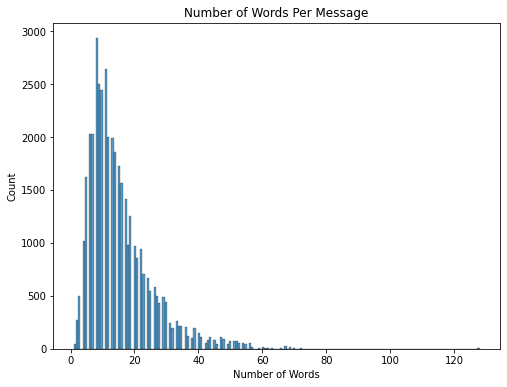

In [27]:
# Histogram of message lengths
num_words = data_clean["message"].apply(lambda x: len(x.split()))

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(num_words, ax=ax)
ax.set_title("Number of Words Per Message")
ax.set_xlabel("Number of Words");

In [28]:
# Find the maximum and minimum word count
print("Minimum number of words in a message: {}".format(np.min(num_words)))
print("Maximum number of words in a message: {}".format(np.max(num_words)))

Minimum number of words in a message: 1
Maximum number of words in a message: 128


We can see that the histgram for the number of words per message appears similar to a Poisson distribution. There are a lot of messages with a few number of words, but a few number of messages with a large number of words. The shortest message has a single word and the longest message has 128 words.

Now let's look at the number of users per neighborhood in St. Himark.

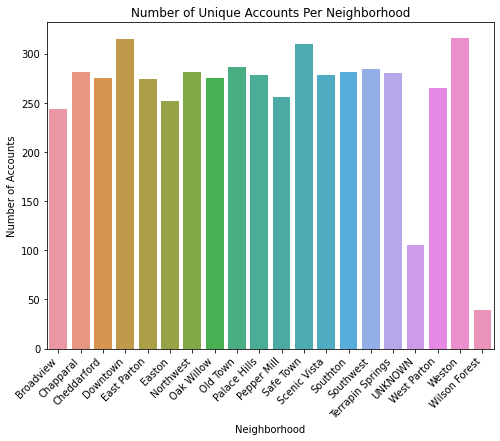

In [29]:
# Calculate the number of unique accounts per district
num_acc_per_district = data_clean[["location", "account"]].drop_duplicates().groupby('location', as_index=False).count()
num_acc_per_district["population"] = num_acc_per_district["account"]

# Histogram of accounts per neighborhood
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(data=num_acc_per_district, x="location", y="population", ax=ax)
ax.set_title("Number of Unique Accounts Per Neighborhood")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Number of Accounts")
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(num_acc_per_district["location"], rotation=45, ha="right");

Because we do not have a method to find the populations of these areas, we can use the number of accounts as an estimate for the population. We can see that most districts have about the same number of accounts, that being somewhere between 250 and 300. The main outliers to this are Wilson Forest, a very rural area with under 50 accounts, and the UNKNOWN area with almost 100 accounts. The three areas with the highest number of accounts are Downtown, Safe Town and Weston. 

Another value that may be important is the number of messages sent per area. That is, some areas may naturally send more messages than other areas, which this plot should help us visualize.

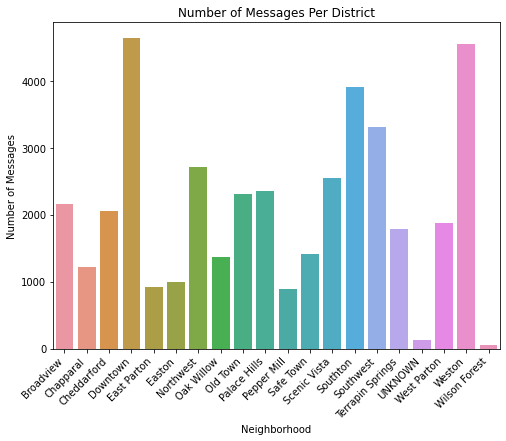

In [30]:
# Calculate the number of messages per district
num_msgs_per_district = data_clean.groupby("location").count().reset_index()

# Plot the number of messages per district
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(data=num_msgs_per_district, x="location", y="message", ax=ax)
ax.set_title("Number of Messages Per District")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Number of Messages")
plt.xticks(rotation=45, ha="right");

This plot shows us some interesting information. The number of messages seems to vary quite a bit, even with most neighborhood having fairly similar numbers of accounts. We can see that Downtown and Weston, two of the areas with the highest number of accounts, also had the highest number of messages. However, Safe Town had a very small number of messages compared to its number of accounts. 

It may be useful for us to see the proportions of number of messages to number of accounts. In other words, the average number of messages that a person in each district sends out.

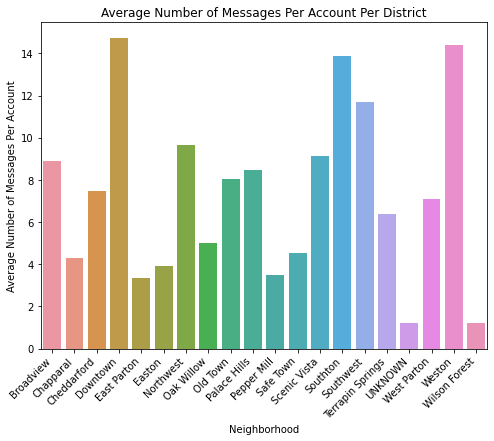

In [31]:
# Find the average number of messages sent by a person in each district
avg_msg_per_acc = num_msgs_per_district["message"] / num_acc_per_district["population"]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x=num_msgs_per_district["location"], y=avg_msg_per_acc, ax=ax)
ax.set_title("Average Number of Messages Per Account Per District")
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Average Number of Messages Per Account")
plt.xticks(rotation=45, ha="right");

We see that the average number of messages per user ranges quite a bit between districts. Users in urban areas, like Downtown and Weston, sent 14 messages each on average during the timespan. Users in more suburban areas, like Old Town and Safe Town, sent on average far fewer messages, and even less than that at the outskirts of town, like in Wilson Forest. This information may be important if we have to decide between two neighborhoods with the same number of messages. If neighborhood A sends the number of messages as neighborhood B, but A generally sends half as many as B, then it may be indicative that neighborhood A is being affected by an issue much more than neighborhood B is. This is something we will need to keep in mind.

Finally, let's look at the time span of our messages. When was the first and last message sent?

In [32]:
# Find the timespan of messages
earliest_time = data_clean["time"].min()
latest_time = data_clean["time"].max()

print("The first message was sent on {}".format(earliest_time))
print("The last message was sent on {}".format(latest_time))
print("This is a range of {}".format(latest_time - earliest_time))

The first message was sent on 2020-04-06 00:00:00
The last message was sent on 2020-04-10 11:59:00
This is a range of 4 days 11:59:00


All the messages were sent over a 5 day period, with the first day being the 6th of April, 2020 and the last day being the 10th of April, 2020. Now we can get to digging into the data!

# What Issues Occurred?

What happened to the city after the earthquake? We want to get as good an idea of what issues each neighborhood faces, which neighborhoods were hit the hardest, and what resources would be needed where.

To start answering this problem, we need to figure out when the earthquake hit. That will be important for answering the rest of the questions. Using the social media messages, we can figure this out be finding when the first few messages that mentioned an "earthquake." This is a large event and is likely to have messages associated with it occuring.

In [57]:
# When did the earthquake occur?
pd.options.display.max_colwidth = 100
data_messages.sort_values("original_time")[data_messages["message_clean"].str.contains("earthquake")].head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


message_clean  ...       original_time
242                                                              absolutely need snatch rumble earthquake  ... 2020-04-06 02:57:00
1786                                         clearly need download rumble earthquake hateearthquakewonder  ... 2020-04-06 11:53:00
5550  jsutust recorded northwest old town mild earthquake jsutust northeast st himark town feel probab...  ... 2020-04-06 14:33:00
5003        hi letting folk know weire aware earthquake occurred acting quickly always safe power company  ... 2020-04-06 14:36:00
2602                                                                           earthquake feeling shaking  ... 2020-04-06 14:39:00
1301                           brad reporting local news station getting call safe town report earthquake  ... 2020-04-06 14:40:00
2601                                                                         earthquake didntididntn feel  ... 2020-04-06 14:40:00
2607                                                                               earthquake still teach  ... 2020-04-06 14:40:00
2605                                                                   earthquake mean study history exam  ... 2020-04-06 14:40:00
2247                                             dear pomelo acting bit todayo due earthquake didnit feel  ... 2020-04-06 14:42:00

[10 rows x 6 columns]

The first two messages mention an earthquake, but seem to be stand alone events that are more focused on "downloading rumble," so are likely not actually refering to the earthquake that hit the city. 

The following messages are from "Earthquake Prediction Center" and "AlwaysSafePowerCompany," which would make sense to be the first to report on such and issue, and directly mention an earthquake occuring. However, we can also see that there are some messages, such as TonyPeterson's "What earthquake??? I didntididntn't feel anything!" which may point to this being a very tiny earthquake, and not the one that actually caused damage throughout the town. Let's take a look at a frequency chart for terms like "earthquake" and "quaking" to see if there is another point where an earthquake could've occured.

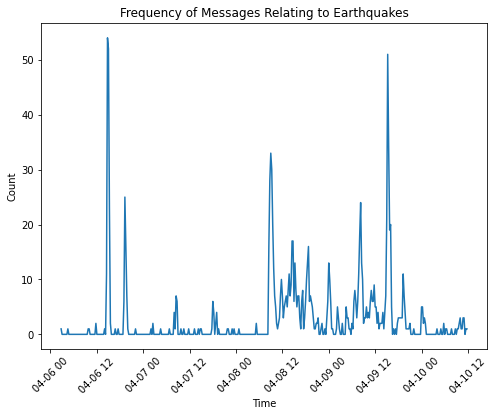

In [58]:
# Find messages that include words like "earthquake" and "quaking"
words = ["earthquake", "quaking", "collapse", "trembling"]
df_earthquake_messages = data_clean.loc[data_clean["message_clean"].str.contains("|".join(words))]
# Plot the Frequency of messages that include those time in 15 minute increments
times = df_earthquake_messages["time"]
df_earthquake_messages_freq = df_earthquake_messages.groupby(pd.Grouper(key="time", freq="15min")).count()

fix, ax = plt.subplots(1, 1, figsize=(8 ,6))
sns.lineplot(x=df_earthquake_messages_freq.index, y=df_earthquake_messages_freq["message"], ax=ax)
plt.title("Frequency of Messages Relating to Earthquakes")
plt.xlabel("Time")
plt.ylabel("Count")
plt.xticks(rotation=45);

From the plot, we see that there is a large amount of activity around 14:30 on 2020-04-06. However, there is barely any mention of the earthquake in the hours after that. There is another large spike in messages around 08:30 on 2020-04-08. Then there is a constant amount of earthquake-related messages. Let's look at some of the messages during that time to see if they're more 

In [59]:
# Look at earthquake messages from after 2020-04-08 at 8:30
check_timestamp = pd.Timestamp(year=2020, month=4, day=8, hour=8, minute=30)
df_earthquake_messages[df_earthquake_messages["time"]>=check_timestamp]

index                time  ... original_loc original_area
17697  18139 2020-04-08 08:36:00  ...     Downtown          West
17698  18140 2020-04-08 08:36:00  ...    Safe Town         North
17705  18147 2020-04-08 08:36:00  ...     Old Town         North
17730  18172 2020-04-08 08:40:00  ...    Safe Town         North
17740  18182 2020-04-08 08:40:00  ...      UNKNOWN           NaN
...      ...                 ...  ...          ...           ...
40723  41448 2020-04-10 11:05:00  ...    Broadview         South
40791  41516 2020-04-10 11:12:00  ...    Southwest          West
40802  41527 2020-04-10 11:14:00  ...    Safe Town         North
41030  41757 2020-04-10 11:38:00  ...    Southwest          West
41155  41884 2020-04-10 11:52:00  ...      UNKNOWN           NaN

[941 rows x 10 columns]

These messages seem much more drastic! There are also messages like "National Earthquake Center reports a major earthquake with an epicenter near town." and "which justifies the idea that this is the more important earthquake. It's likely that the first mentioned earthquake was a small tremor and was just a prelude to the actual disaster. From these messages, I will place the time of the earthquake at 08:36 on 2020-04-08. We can use this time to find the extent of the issues both 5 hours and 30 hours after the event.

In [61]:
# Define the time of the earthquake.
time_of_earthquake = pd.Timestamp(year=2020, month=4, day=8, hour=8, minute=36)
# Define a time 5 hours from the earthquake
five_after_earthquake = time_of_earthquake + pd.Timedelta(hours=5)
# Define a time 30 hours from the earthquake
thirty_after_earthquake = time_of_earthquake + pd.Timedelta(hours=30)

Now we have defined our times, let's start by analyzing where resources should be sent after the first 5 hours.

In [70]:
# Create a dataframe for all messages posted in the 5 hour range.
data_5_hour = data_clean[(data_clean["time"]>=time_of_earthquake) & (data_clean["time"]<=five_after_earthquake)]
# Create a dataframe of messages posted for the first time in the 5 hour range.
data_messages_5_hour = data_5_hour.groupby("message_clean", as_index=False).agg(
                          count=pd.NamedAgg(column="message", aggfunc="count"),
                          original_message=pd.NamedAgg(column="message", aggfunc="first"),
                          original_acc=pd.NamedAgg(column="account", aggfunc="first"),
                          original_loc=pd.NamedAgg(column="location", aggfunc="first"),
                          original_time=pd.NamedAgg(column="time", aggfunc="first"))

The first way we can do this is to see which messages where reposted the most during this time. This should give us an idea of what the residents considered to be the most pressing issues.

In [71]:
# Find the most reposted messages during the 5 hours
data_messages_5_hour.sort_values("count", ascending=False).head(10)

message_clean  ...       original_time
3                12th july bridge closed notice precautionary action pending safety inspection use route  ... 2020-04-08 09:05:00
945                                                                     uncle heard wife city evacuating  ... 2020-04-08 11:08:00
527               magritte bridge closed notice precautionary action pending safety inspection use route  ... 2020-04-08 09:05:00
952                                                         used gradient react hood dead fun winsthecan  ... 2020-04-08 08:36:00
265                                                                   eustice lost still long road ahead  ... 2020-04-08 12:44:00
0                                                                                                         ... 2020-04-08 08:44:00
569                                                                      news say 86 fatality sure trust  ... 2020-04-08 11:00:00
605  outhgehouses sthgearthgeed going look like thgehoughthge thgerying thgehe marina line thgehere t...  ... 2020-04-08 11:44:00
322                                                                        friend rich said 234 fatality  ... 2020-04-08 12:29:00
335                                                                            glad found one work great  ... 2020-04-08 08:51:00

[10 rows x 6 columns]

We can see that the most reposted messages have to do with bridge closures and numbers of fatalities. These are important, but they don't give us specific information on which districts could use which resources. One idea would be to figure out what percentage of messages pretaining to each issue comes from each district. Then the districts with the highest percentage are likely to be where we should focus on sending resources.

Let's do that now with message pretaining to road issues. To do figure out what messages pretain to road issues, we will need words that correspond to those issues. By looking through the messages, we can create the following lists for each issue. Then we can analyze the proportions of messages that contain those words (i.e. pretain to those issues).

In [72]:
# Define lists of words for the different repair teams
road_words = ["collapse", "rubble", "crumble", "crack", "damage", "road ", "traffic", "sinkhole"]

In [73]:
def PlotPieForMsgProps(df, which_loc, title, startangle=0):
  '''
  Creates a pie plot of proportions of messages sent per district.

  Input:
    - df: Dataframe of locations and proportions of messages 
          from each location (column labeled 'prop')
    - which_loc: String name of column containing locations. 
        - {'location', 'original_loc', 'intended_loc'}
    - title: String title of the plot
    - startangle: Optional Integer in [0, 360]. Defines starting angle of plot.
  '''
  # Plot the proportions of each district with a pie plot
  fig, ax = plt.subplots(1, 1, figsize=(8, 6))
  colors = plt.cm.prism(np.linspace(0.0, 1.0, len(df)))
  slices, _ = ax.pie(df["prop"],
                     labels=df[which_loc],
                     colors=colors,
                     startangle=startangle)
  # Set each pie slice edgecolor to white
  for slc in slices:
    slc.set_edgecolor("white")
  # Set label strings for the legend
  labels = ['{0} - {1:1.2f}%'.format(i, j) for i, j in zip(df[which_loc],
                                                           df["prop"])]
  # Sort the slices by size
  slices, labels, _ = zip(*sorted(zip(slices, labels, df["prop"]),
                                  key=lambda x: x[2],
                                  reverse=True))

  ax.legend(slices, labels, bbox_to_anchor=(1.1, 1))
  ax.set_title(title);

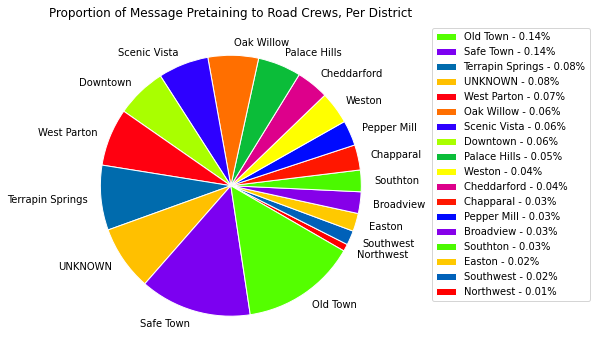

In [74]:
# Calculate the number of messages sent from each location
# that have to do with road issues
data_5_hour_road_msgs = data_messages_5_hour[data_messages_5_hour["message_clean"].str.contains("|".join(road_words))]\
                        .groupby("original_loc").sum().reset_index()
data_5_hour_road_msgs["prop"] = data_5_hour_road_msgs["count"] / np.sum(data_5_hour_road_msgs["count"])
data_5_hour_road_msgs.sort_values("prop", inplace=True)

# Plot the road message proportions
PlotPieForMsgProps(data_5_hour_road_msgs, 
                   "original_loc",
                   "Proportion of Message Pretaining to Road Crews, Per District",
                   startangle=330)

The pie chart shows us that Old Town, Safe Town, UNKNOWN, Terrapin Springs and West Parton are the areas that produced the most messages about road issues. That means we should focus our attention on those locations.

However, we do have to be careful. There are two potential issues that with these calculations: 
- Different accounts will post different amounts of messages. If one user posts 100 messages, and another user only posts 2, a basic frequency count will greatly favor the 100 messages. That could mean that some locations "naturally" produce more messages than the others.
- There are different amounts of people in each district. It is likely that districts with more people will produce more messages, which we want to account for.

To address the first issue, we can calculate the proportion of messages that contain words pretaining to certain issues. That is, if 50% of all messages sent from one area are about about a problem, and only 20% of messages from other areas talk about the problem, then we have evidence to prioritize the first area. For the second issue, we can find the proportion of accounts that mention an issue. That is, if 50% of active users in one area mention an issue, then we should prioritize that area over others if only 20% of users mention an issue. The is, the first calculates the proportion of messages, the second calculates the proportion of users.

In [75]:
def CalcPropOfMatchingMsgs(df, which_loc, words, freq="15min"):
  '''
  Calculates the proportions of messages that contain the desired words.
  
  Inputs:
    - df: DataFrame with (at least) the following columns
        - Some column to specify the location. Will match `which_loc` variable.
        - time: Datetime of when the message was posted
        - account: The name of the user sending the message
        - message: The message being sent
        - original_area: The area (abstraction of location) that the original message was located from.
    - which_loc: String name of column containing locations. 
        - {'location', 'original_loc', 'intended_loc'}
    - words: List of strings. These strings will be searched for
             within the messages to determine the proportion of
             messages that contain the words.
    - freq: Optional string pretaining to the frequency of time
            to group the message by.

  Outputs:
    - df_area: Dataframe of calculated proportions, grouped by areas.
    - df_loc: Dataframe of calculated proportions, grouped by location.
  '''

  # Calculate the number of messages and the number of unique accounts, per time interval
  df_loc_count = df.groupby([which_loc, pd.Grouper(key="time", freq=freq)]).agg(
                            total_account=pd.NamedAgg(column="account", aggfunc=pd.Series.nunique),
                            total_msg=pd.NamedAgg(column="message", aggfunc="count"),
                            original_area=pd.NamedAgg(column="original_area", aggfunc="first")).reset_index()
  df_area_count = df_loc_count.groupby(["original_area", pd.Grouper(key="time", freq=freq)]).agg(
                            total_account=pd.NamedAgg(column="total_account", aggfunc="sum"),
                            total_msg=pd.NamedAgg(column="total_msg", aggfunc="sum")).reset_index()

  # Filter out messages that don't contain any of the specified words
  df_words = df[df["message_clean"].str.contains("|".join(words))]
  # Count the number of messages that contain those words, and accounts that 
  # posted those messages.
  df_words_loc_count = df_words.groupby([which_loc, pd.Grouper(key="time", freq=freq)]).agg(
                                num_matched_account=pd.NamedAgg(column="account", aggfunc=pd.Series.nunique),
                                num_matched_msg=pd.NamedAgg(column="message", aggfunc="count"),
                                original_area=pd.NamedAgg(column="original_area", aggfunc="first")).reset_index()
  df_words_area_count = df_words_loc_count.groupby(["original_area", pd.Grouper(key="time", freq=freq)]).agg(
                                num_matched_account=pd.NamedAgg(column="num_matched_account", aggfunc="sum"),
                                num_matched_msg=pd.NamedAgg(column="num_matched_msg", aggfunc="sum")).reset_index()

  # Join the datasets, per location and area
  df_loc = df_loc_count.merge(df_words_loc_count.drop("original_area", axis=1), how="left", on=[which_loc, "time"]).fillna(0)
  df_area = df_area_count.merge(df_words_area_count, how="left", on=["original_area", "time"]).fillna(0)
  # Calculate the proportion of users that posted messages that matched words
  df_loc["prop_matched_account"] = df_loc["num_matched_account"] / df_loc["total_account"]
  df_area["prop_matched_account"] = df_area["num_matched_account"] / df_area["total_account"]
  # Calculate the proportion of messages that contained the words
  df_loc["prop_matched_msg"] = df_loc["num_matched_msg"] / df_loc["total_msg"]
  df_area["prop_matched_msg"] = df_area["num_matched_msg"] / df_area["total_msg"]

  return df_area, df_loc

In [76]:
def PlotMessageProps(df, which_loc, title1, title2, title3):
  '''
  Plots the number of messages and proportions of messages over time. These are
  values have been calculated in the CalcPropOfMatchingMsgs function.

  Inputs:
    - df: Dataframe of values that will be plotted. Specifically contains (at least)
          these columns.
          - time: The timestamp of a group of messages.
          - num_matched_msg: The number of messages that contain the specified
              words.
          - prop_matched_msg: The proportion of messages that contain the 
              specified words.
          - prop_matched_account: The proportion of accounts that posted messages
              contained the specified words.
          - location: The district that the messages where sent from.
          - area: An abstraction of location. Another measure of where the messages
              where sent from.
    - which_loc: String name of column containing locations. 
        - {'location', 'original_loc', 'intended_loc'}
    - title1, title2, title3: String names of the plots
  '''
  fig, ax = plt.subplots(3, 1, figsize=(15, 10))

  # Plot the number of messages sent per 15 minutes
  sns.lineplot(data=df, x="time", y="num_matched_msg", hue=which_loc, ax=ax[0])
  ax[0].set_title(title1)
  ax[0].set_ylabel("Count")
  ax[0].set_xlabel("Time")
  ax[0].axvline(time_of_earthquake, c="black", linestyle="--", label="Earthquake")
  ax[0].legend(loc="upper right", bbox_to_anchor=(1.125, 1))
  plt.subplots_adjust(hspace=0.4)

  # Plot the proportion of messages that contain the matching words
  sns.lineplot(data=df, x="time", y="prop_matched_msg", hue=which_loc, ax=ax[1])
  ax[1].set_title(title2)
  ax[1].set_ylabel("Proportion")
  ax[1].set_xlabel("Time")
  ax[1].legend().remove()
  ax[1].axvline(time_of_earthquake, c="black", linestyle="--")

  # Plot the proportion of accounts that mentioned the specified words
  sns.lineplot(data=df, x="time", y="prop_matched_account", hue=which_loc, ax=ax[2])
  ax[2].set_title(title3)
  ax[2].set_ylabel("Proportion")
  ax[2].set_xlabel("Time")
  ax[2].legend().remove()
  ax[2].axvline(time_of_earthquake, c="black", linestyle="--")

These two functions will help us calculate and plot the frequencies of specific words within messages over the 5 hour range. That will allow us to see when certain messages are being sent, whether the issues are constant or spontaneous, and what proportion of each location is being affected by them at a given time.

Let's check the 5 locations we already determined to have the most messages pretaining to road issues.

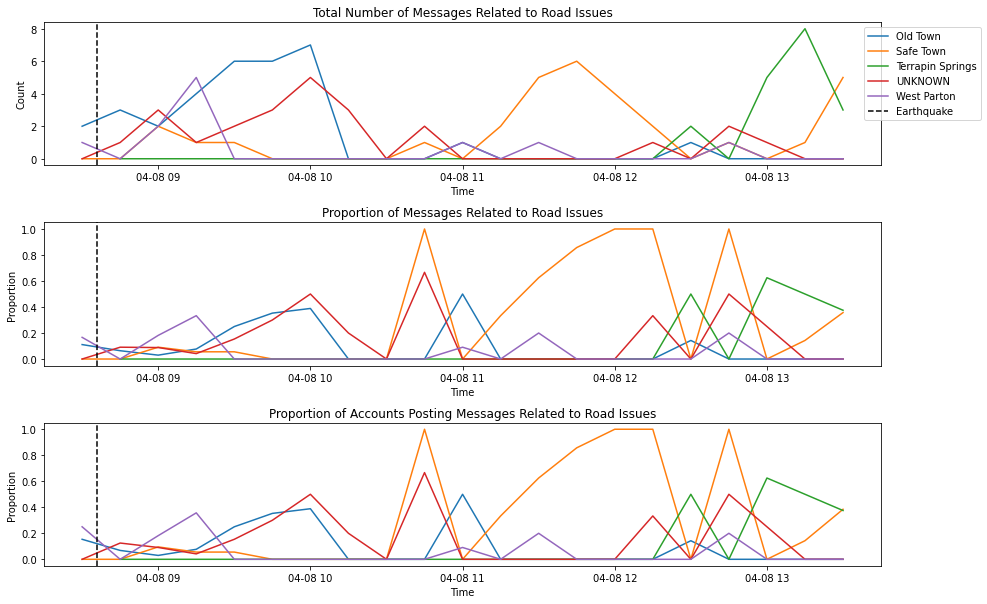

In [77]:
# Which areas are most likely to need a road crew?
data_area, data_loc = CalcPropOfMatchingMsgs(data_5_hour, "original_loc", road_words)
PlotMessageProps(data_loc[data_loc["original_loc"].isin(["Old Town", "Safe Town", "UNKNOWN", "Terrapin Springs", "West Parton"])], 
                 "original_loc", 
                 "Total Number of Messages Related to Road Issues",
                 "Proportion of Messages Related to Road Issues",
                 "Proportion of Accounts Posting Messages Related to Road Issues")

When determining if an area need help, we're looking for three things:
1. A high number of messages relating to the issue.
2. A high proportion of the total messages mention the issue.
3. A high proportion of the total accounts have sent messages about the issue.

If these are all true for a location, then it provides a lot of evidence that an issue is very apparent in an area and we should send a team that way to address those issues.

From the top plot, we can see that there was a large amount of messages in the few hours after the earthquake occured, and then there was a lull in the amount of messages. We can see that all of the 5 areas had times when many messages concerning road problems were being posted, and have other times where very little was being posted. Old Town and UNKNOWN posted the most in the first few hours, Safe Town posted much more after about 3 hours, and Terrapin Springs posted the most at the end of the 5 hours. During these times, these messages where a high proportion of the total messages being sent, so that is evidence that some road damage has occured in those areas. 

To make final conclusions, we should observe the messages themselves. Lets take a look at the most reposted messages for each of those locations. If those messages talk about road issues, then we can be confident that we should send resources to those areas. This may also help us determine where to send resources for the UNKNOWN location, as it may mention 

In [78]:
# Most reposted messages from Downtown
# data_messages_5_hour[data_messages_5_hour["original_loc"]=="UNKNOWN"].sort_values("count", ascending=False).head(5)

def PrintMostRepostedInLocs(k, df, which_loc, specified_locs, words):
  '''
  Prints the k most reposted messages from a district

  Input:
    - k: Integer number of messages
    - df: Dataframe containing messages and counts of times message was posted
    - which_loc: String name of column containing locations. 
        - {'location', 'original_loc', 'intended_loc'}
    - specified_locs: List of Strings of locations in dataframe. 
        The top k message from each of these will be printed
    - words: List of strings to find the messages that contain the words.
  
  Output:
    - None
  '''
  # For each location, print the top k messages from that location that pretain to the issue
  for loc in specified_locs:
    print("{}:".format(loc))
    # Find the k most reposted messages in that location
    df_k = df[(df[which_loc]==loc) & (df["message_clean"].str.contains("|".join(words)))].sort_values("count", ascending=False).head(k)
    # Print those messages
    for message in df_k["original_message"]:
      print(message)
    print()

In [79]:
# Check each district's most reposted messages
PrintMostRepostedInLocs(5, data_messages_5_hour, "original_loc", ["Old Town", "Safe Town", "UNKNOWN", "Terrapin Springs", "West Parton"], road_words)

Old Town:
KRAK TV: Meet baby Jereme, a 6lb boy born during the earthquake in the back of an ambulance. 'We were on our way to the hospital when the earthquake hit. The ambulance had to stop because of the rubble,' said mom. The family is thankful medics were there to help them 
Our neighborhood has been hit hard. All the old brick buildings have collapsed or are heavily damaged. #neighborhood
My building collapsed around me!
Old Town hospital is heavily damaged!
someone he structural integrity something failure: inspections damages defects testing repair they it near anyone involving an overturned vehicle. anyone use alternate roads #WinsdamagesWaste

Safe Town:
Always Safe security fence is down and one their buildings has partially collapsed. You can walk right in! We need some cops out here right away
A janitor at Always Safe says the plant is damaged but cant give any details. He said he just ran out and drove away.
Buildings are damaged, windows broken... I can smell smoke somewhe

From the messages themselves, it appears that Old Town and Safe Town are the most beset by road issues. Messages from Terrapin Springs and West Parton mention some damages, but nothing to extreme. It also appears that the most reposted messages from the UNKNOWN area are alerts and reports on issues of other areas. Maybe we can use that in our data analysis?

Overall, from these plots and messages, we can determine that we should send road crews to Old Town and Safe Town. However, it would be better if the UNKNOWN locations didn't show up as UNKNOWN, but where actually attributed to the areas that each message mentions. That is, it would be helpful if we could come up with a way to have the messages attributed to the locations that they are about, rather than just their original location.

For example, the following message was posted in Downtown:

> "Broken water and sewer pipes pose a risk of contaminated water. Neighborhoods Old Town, Safe Town, Scenic Vista, Broadview, Chapparal, Easton should boil their drinking water for 2 minutes."

We don't want to look at that message and think something is going wrong in Downtown. We want to be able to attribute the issues outlined in that message to the other named neighborhoods. What is a good way to do that?

One way would be to create a new dataset of "intended" locations. That is, a dataframe that consist of messages and the location that those messages are **most likely** about. To make this dataset, we will follow these rules:

1. For every location named in a message, add a message with that location as the intended location. That means the location that the message was sent from is *not* the intended location.
2. If no other location is named, then the neighborhood that the message was sent from is the intended location.
3. If a message is a repost, then the intended location of the original message is the intended location of the repost aswell.

It should be mentioned that there are some issues with this process. In all likelihood, this will mislabel some locations, but the hope is that the overall data should be more useful. Another potential issue is that this will artificially inflate the number of messages that are being sent. If a message mentions two different locations, then the new data will be as if there where two messages that each mentioned a location once. This artificial inflation may introduce some bias, but I am okay with it because it should be biasing our data towards locations that are being actively talked about, which is what we are ultimately trying to understand.

So, we're going back to our data to do some more cleaning and feature engineering. The first thing we can do is convert neighborhood codes to neighborhood names. If you look at the city map, each district has a number. In some messages, neighborhoods are refered to by those numbers. To simplify the process of finding "intended locations," we can map all those code to their respective names.

In [80]:
# Create a mapping of neighborhood codes to names
# Because of how we defined the above dict, the keys are already in code order.
neighborhood_names = [name.lower() for name in list(district_to_area.keys())]
# Create a dictionary of district code to district names
neighborhood_map = {}
code = 1
for neighborhood in neighborhood_names:
  # Add spaces because we only want stand alone numbers, 
  # also don't want to recognize other numbers that aren't in map
  neighborhood_map[" {} ".format(code)] = " {} ".format(neighborhood)
  code = code + 1

# Add a few extra "secondary" locations to map to the neighborhood name
neighborhood_map[" always safe nuclear power plant"] = " safe town "
neighborhood_map[" north east "] = " old town safe town "
neighborhood_map[" north "] = " northwest old town safe town "
neighborhood_map[" south "] = " broadview oak willow chapparal scenic vista "
neighborhood_map[" east "] = " pepper mill terrapin springs wilson forest "
neighborhood_map[" west "] = " palace hills southwest downtown "

def MapNeighborhoodCodeToName(msg):
  # Only change a number to a name if the word 'neighborhood' or 'town' is in the message
  # Has a small number of false positives, but largely works.
  if 'neighborhood' in msg or 'town' in msg:
    for key in neighborhood_map.keys():
      msg = msg.replace(key, neighborhood_map[key])
  return msg

data_clean["message_clean"] = data_clean["message_clean"].apply(MapNeighborhoodCodeToName)

Now we need to extract the intended location(s) from each message, and store those in a new dataframe.

In [81]:
# Split the data into two dataframes
# One df that contains locations in the messages, one that does not
data_mention_town = data_clean[data_clean["message_clean"].str.contains("|".join(neighborhood_names))]
data_not_mention_town = data_clean[~data_clean["message_clean"].str.contains("|".join(neighborhood_names))]

# Add an "intended location" column to the df that doesn't mention towns
data_not_mention_town_intended = data_not_mention_town.groupby("message_clean").agg(
    intended_loc=pd.NamedAgg(column="original_loc", aggfunc="first")
).reset_index()
data_not_mention_town_intended["intended_loc"] = data_not_mention_town_intended["intended_loc"].apply(lambda x: str.lower(x))
data_not_mention_town = data_not_mention_town.merge(data_not_mention_town_intended, how="left", on="message_clean")

In [82]:
# Add an "intended location" column to the df that does mention towns in messages
def GetIntendedLocs(row, neighborhood_names):
  '''
  Takes a row from a dataframe and creates a dataframe of two columns and k rows:
    - The message, repeated k times
    - A unique location mentioned in the message. k is the number of unique locations.

  Input:
    - row: Row of a dataframe. Has column 'message_clean' to be scanned
           to see if it contains a message.
    - neighborhood_names: List of string names of districts in town.

  Output:
    - A DataFrame, as specified.
  '''
  # Initialize a dictionary to store the messages and found locations
  loc_dict = {"message_clean":[], "intended_loc":[]}
  message = row.iloc[0]["message_clean"]
  # Find each neighborhood location that is mentioned in the message
  for name in neighborhood_names:
    if name in message:
      # Create an individual entry for that location and message.
      loc_dict["message_clean"].append(message)
      loc_dict["intended_loc"].append(name)
  return pd.DataFrame(loc_dict)

data_mention_town_intended = data_mention_town.groupby("message_clean", as_index=False)\
  .apply(lambda x: GetIntendedLocs(x, neighborhood_names))\
  .reset_index(drop=True)

In [83]:
# Add the intended messages to the original dataframe
data_mention_town_final = data_mention_town_intended.merge(data_mention_town, how="left", on="message_clean")
# Append the dataframe that mention locations and the dataframe that does not
data_intended = data_mention_town_final.append(data_not_mention_town)

# Recreate the time-range dataframes
data_5_hour_intended = data_intended[(data_intended["time"]>=time_of_earthquake) & (data_intended["time"]<=five_after_earthquake)]
data_messages_5_hour_intended = data_5_hour_intended.groupby(["message_clean", "intended_loc"], as_index=False).agg(
                          count=pd.NamedAgg(column="message", aggfunc="count"),
                          original_message=pd.NamedAgg(column="message", aggfunc="first"),
                          original_acc=pd.NamedAgg(column="account", aggfunc="first"),
                          original_loc=pd.NamedAgg(column="location", aggfunc="first"),
                          original_time=pd.NamedAgg(column="time", aggfunc="first"))

Now that we've mined the intended location from the messages, let's recreate our plots and see if they give us a better view of where the problems are actuallly occuring. We can create a function that will create all of our plots and output in a single function call.

In [84]:
# Define a function to create the above plots and outputs in a single function call
def PlotIssueLocations(df_time, df_messages, which_loc, words, issue, num_locs, startangle=0, freq="15min", num_msg=5):
  '''
  Function to plot figures related to which locations are producing messages
  relating to specified words.

  Inputs:
    - df_time: Dataframe of individual messages and times
    - df_messages: Dataframe of grouped messages, and counts of messages
    - words: List of specified words related to an issue.
    - issue: String name of issue that is being searched for.
    - num_locs: Int number of locations that be looked at more in depth.
    - startangle: Optional Int in [0, 360] for plotting pie chart
    - freq: Optional String time of how often to group words in timeseries.
    - num_msg: Optional Int for the number of "most reposted messages" to display, per location.
    - include_pie_legend: Include legend on the pie plot.

    Output:
    - None
  '''
  # Calculate the proportions of messages relating to the issue
  df_msg_counts_per_loc = df_messages[df_messages["message_clean"].str.contains("|".join(words))]\
                          .groupby(which_loc).sum().reset_index()
  df_msg_counts_per_loc["prop"] = df_msg_counts_per_loc["count"] / np.sum(df_msg_counts_per_loc["count"])
  df_msg_counts_per_loc.sort_values("prop", inplace=True)

  # Pie plot of message proportions
  PlotPieForMsgProps(df_msg_counts_per_loc, 
                     which_loc,
                     "Proportion of Message Pretaining to {} Issues After {} Hours, Per District".format(issue[0], issue[1]),
                     startangle=startangle)

  # Get the num_locs locations with the greatest proportion
  top_locations = df_msg_counts_per_loc[which_loc][-num_locs:]

  # Plot the frequency and proportion of messages, per location, per time
  df_area, df_loc = CalcPropOfMatchingMsgs(df_time, which_loc, words)
  PlotMessageProps(df_loc[df_loc[which_loc].isin(top_locations)], 
                   which_loc, 
                   "Total Number of Messages Related to {} Issues After {} Hours".format(issue[0], issue[1]),
                   "Proportion of Messages Related to {} Issues After {} Hours".format(issue[0], issue[1]),
                   "Proportion of Accounts Posting Messages Related to {} Issues After {} Hours".format(issue[0], issue[1]))
  
  # Print the num_msg most resposted messages for each of the top locations
  PrintMostRepostedInLocs(num_msg, df_messages, which_loc, top_locations, words)

chapparal:
Extensive damage on the north and south sides. Although no neighborhood has escaped damage. Severals fires throughout City. 
Closing bridges is good. Help prevent more casualties from collapsed bridges.
Department of Transportation: We need your help. Dachsunds are blocking the main road in Neighborhood 10. Pick up the dachsunds if you see them so we can clear rubble. Bring them to the Galactic Truth Church at 2nd and Main
It's good that we're taking precautions before serious damage takes place
Never thought bricks would cause such a traffic jam!

scenic vista:
Extensive damage on the north and south sides. Although no neighborhood has escaped damage. Severals fires throughout City. 
We @RunsFrancis_HowardOctopus are trying to evacuate but the roads are jammed. Will there be a tsunami? Does anyone know?
Look at that damage - this was a 4 story apartment building - help needed.
Will insurance cover cracks in the driveway, or do they need to be actual fisures?
Lot of schisms 

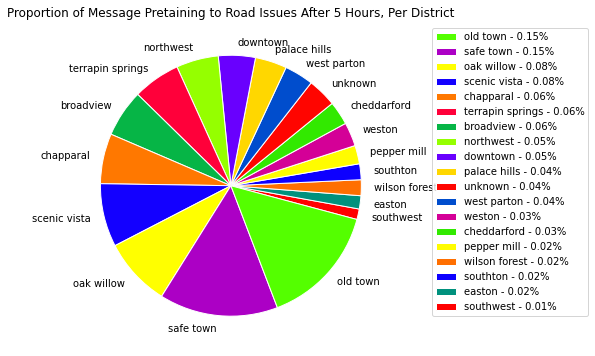

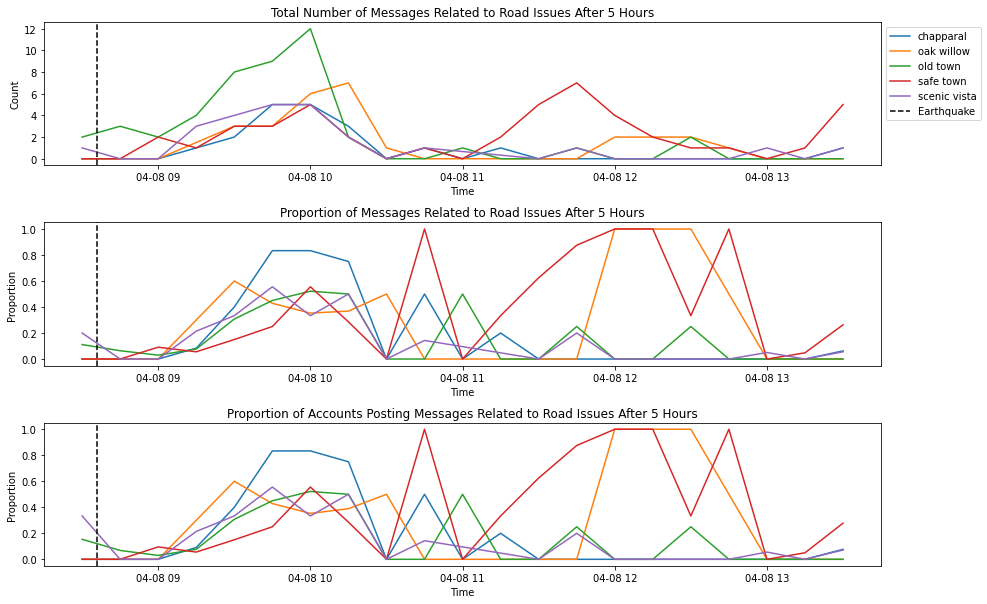

In [85]:
# Recreate 5-hour road issue plots with "intended loc" rather than "original loc"
PlotIssueLocations(data_5_hour_intended, data_messages_5_hour_intended, "intended_loc", road_words, ("Road", "5"), 5, startangle=345)

With the added "intended locations," we find that the locations with the most severe road damage to be Old Town, Safe Town, Oak Willow, Scenic Vista and Chapparal. Some of these agree with our earlier data, but some are new, so let's take a look at the messages and see which areas are in greater need of a road crew.

The plots show that the north-eastern and southern areas suffered the most damage. This conclusion is supported by one of the reposted messages which says: "Extensive damage on the north and south sides. Although no neighborhood has escaped damage. Severals fires throughout City." The messages over time plots show that all the areas had a large amount of messages just after the earthquake occured, then lessened as time went on. However, Safe Town had a larger amount of messages than the others in the following hours, meaning that area had issues that where likely severe and unsolved. When looking at messages from the five new locations, we can see that they have all been hit hard by the earthquake, and experience collapsing buildings, fires and fissures in the roads. These are much more severe issues than our the selection we got originally, so we can say the method with the "intended locations" was an improvment! Overall, we should send road crews to the North-Eastern and Southern areas, prioritizing Old Town, Safe Town and Oak Willow. 

Now, we can finally move on to the other issues. Next, lets see what areas need help from a sewer repair crew in the first 5 hours.

old town:
Water is contaminated. Serious reactions reported in the following neighborhoods Old Town,Safe Town,Scenic Vista,Broadview,Chapparal
Broken water and sewer pipes pose a risk of contaminated water. Neighborhoods Old Town, Safe Town, Scenic Vista, Broadview, Chapparal, Easton should boil their drinking water for 2 minutes.
It hasn't rained in days, but my basement is flooded.  How does that happen?

safe town:
Department of Health and the St Himark Water and Sewer Department: Broken water and sewer pipes create of risk of contaminated drinking water. The following neighborhoods should boil their water: 4, 8,9,10,14.
Water is contaminated. Serious reactions reported in the following neighborhoods Old Town,Safe Town,Scenic Vista,Broadview,Chapparal
Broken water and sewer pipes pose a risk of contaminated water. Neighborhoods Old Town, Safe Town, Scenic Vista, Broadview, Chapparal, Easton should boil their drinking water for 2 minutes.

chapparal:
Department of Health and the St H

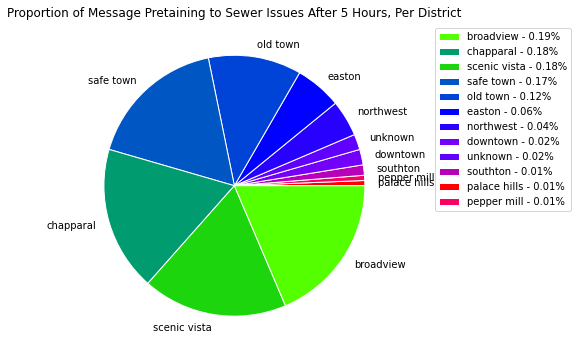

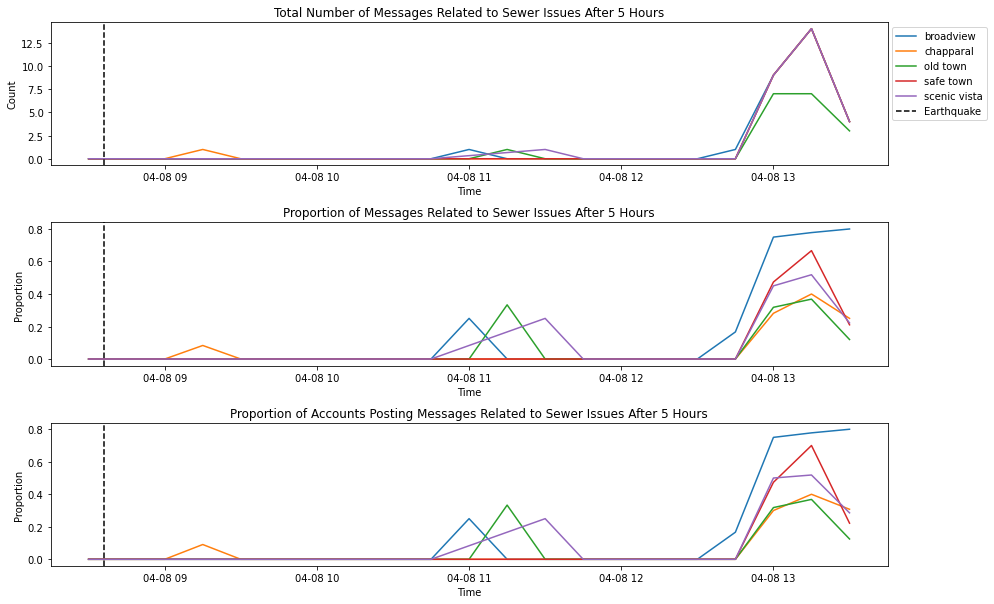

In [86]:
# Plot the locations of messages relating to sewer words.
sewer_words = ["flood", "contaminate", "sewer", "pipe"]
PlotIssueLocations(data_5_hour_intended, data_messages_5_hour_intended, "intended_loc", sewer_words, ("Sewer", 5), 5, startangle=0)

Again, the Northern and Southern coasts appear to have taken the majority of the damage. Of the locations, Chapparal, Scenic Vista and Broadview had the highest frequency and proportions of messages. When we actually look at the messages, it confirms that these locations have some serious sewer issues, with reports of basements and streets flooding.

We can see that there weren't many mentions of sewer problems within the first few hours of the earthquake, but then grew as time went on. Most likely, citizens where concerned with immediate effects of buildings collapsing and roads cracking, and not the underground water system. However, as time went on, the damage to the sewers became more apparent. There are also many mentions of contaminated water, which is something we can keep in mind for the 30 hour analysis and when we're thinking of what resources to send to which areas of the city (i.e. bottled water).

Now to look at which areas are in most need of rescue teams during the first 5 hours after the earthquake.



safe town:
Extensive damage on the north and south sides. Although no neighborhood has escaped damage. Severals fires throughout City. 
Help is on the way! We have teams of volunteers out in the neighborhoods helping as much as they can, please remain calm and stay cautious of your surroundings! @Mrs.Tillenbottom We have your back! #FTWHelpWonder
I see a lot of white smoke/steam coming out of that big tower at the plant? Should I be worried? #GreatsmokesteamCan
Buildings are damaged, windows broken... I can smell smoke somewhere... Hope everyone is safe.
We at Always Safe Company are quickly reacting to the earthquake. Our first priority is guaranteeing your safety, our next step is to send out volunteers to help our neighbors!

old town:
Extensive damage on the north and south sides. Although no neighborhood has escaped damage. Severals fires throughout City. 
KRAK TV: Meet baby Jereme, a 6lb boy born during the earthquake in the back of an ambulance. 'We were on our way to the hospit

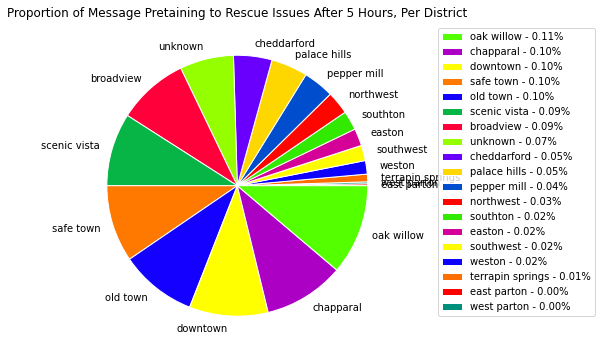

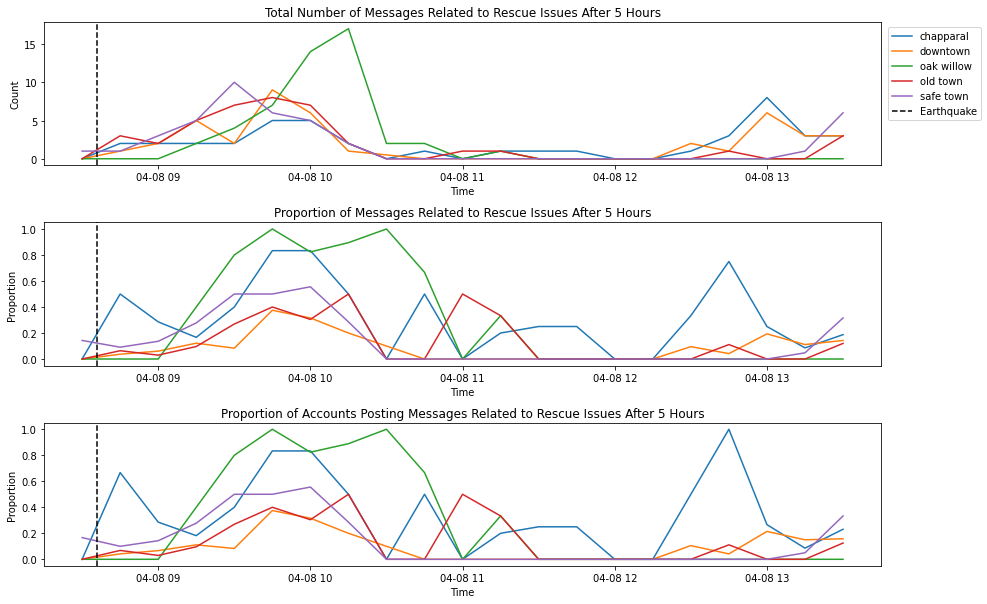

In [124]:
# Find the main locations that need assistance from rescue teams
rescue_words = ["rescue", "help", "trap", "stuck", "save", "hospital", "medic", "fire", "smoke"]
PlotIssueLocations(data_5_hour_intended, data_messages_5_hour_intended, "intended_loc", rescue_words, ("Rescue", "5"), 5, startangle=0)

Again, it looks like people on the Northern and Southern coasts need to most help. Most importantly, the hospital in Old Town has collapsed, so that area will need extra help from rescue and medical workers. Alongside that, there are several buildings and sinkholes in Old Town, Chapparal and Oak Willow that have trapped individuals, and require assistance.

By looking at the time series plot, we can see that the most immediate time is within 2 hours off the earthquake occuring. Afterwards, there is a lull, then many more messages are after a few hours, primarily from Downtown and Chapparal. However, by looking at those messages, we can determine that those locations largely don't need help, as the citizens are giving opinions and advice.

Again, we should focus our resources on the Northern and Southern coasts, as that is where most of the immediate help is needed. Lastly, lets look at what locations are in most need of power/electricity repair crews.

scenic vista:
I keep seeing the power trucks drive by, but nothing seems to be chaning.  Are they out test driving?
minister challenges utilities on nuclear power is a meltdown, the wind will carry all the way to boil water
My power jsutust went out! hecko, @AlwaysSafePowerCompany???
they powerlines on bus line: they it bound approaching he anyone removed. ^ag
Protect Yourself From anything anyone someone For it Of she it he something someone The summer meeting of the Lithuanian nuclear power plant.. @FearsEileenWhale

unknown:
St. Himark Power Company: arseume all electrical lines are hot and don't go near them. Our crews are working to restore power as fast as possible.

downtown:
This just in. We have unconfirmed reports of sirens sounding at the Always Safe Nuclear Power Plant
The gas station by the fire station has power and can pump gas. #fireWonder
No power= no sleep= cranky pants this morning, garden burger for lunch... ergg but mommies ronis sound sooo much pressure
they power

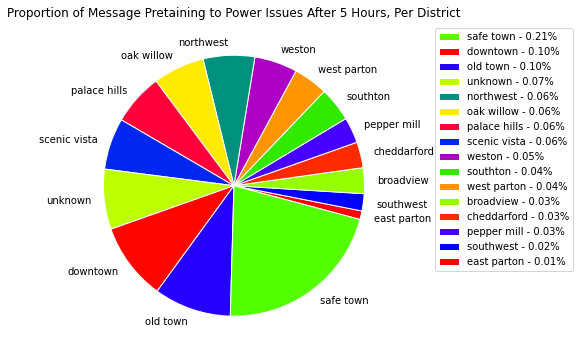

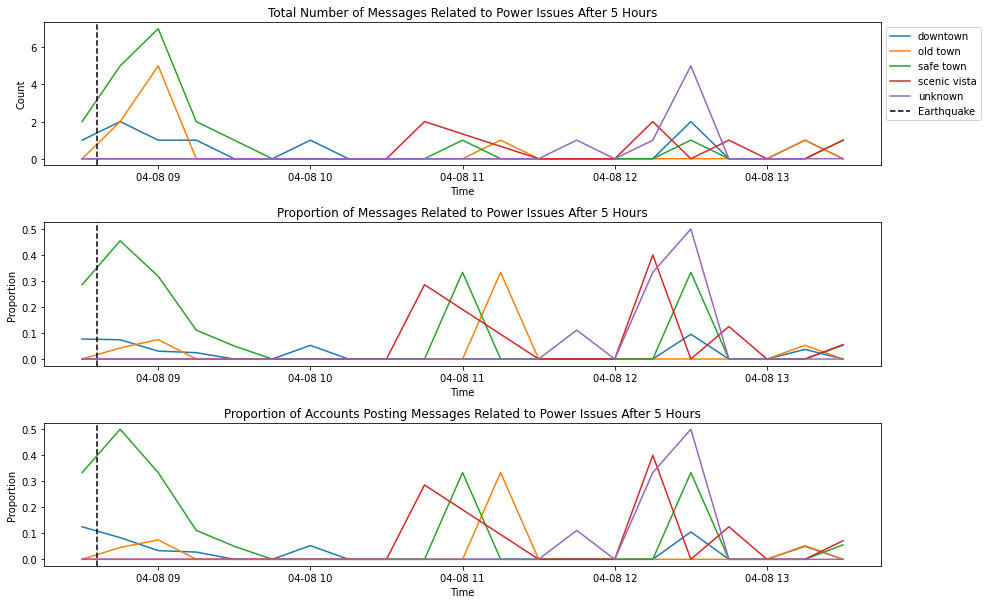

In [113]:
# Which areas need power repair crews in the first 5 hours?
power_words = ["power ", "lines", "wire", "electricity", "outage"]
PlotIssueLocations(data_5_hour_intended, data_messages_5_hour_intended, "intended_loc", power_words, ("Power", "5"), 5, startangle=345)

Unsuprisingly, the nuclear power plant is the center of a lot of conversation about the power in the city. The power plant itself has shut down and appears to have some structural damage, which should be a major priority in fixing. We don't want the earthquake to lead to radioactive damages and problems. The earthquake has also knocked down a few powerlines, notably in Safe Town, Old Town and Scenic Vista.

From the proportions, we can see that the Northern areas were the hardest hit, followed by the rest of the areas, which all suffered some damage. From the time series, we can see that most reports came in immediately after the earthquake, then had occasional mentions in the coming hours. It should also be noted that no area had no messages during this time, meaning that no entire area was cut off from the internet and was unable to send messages using the app.

The focus should absolutely be on the Always Safe Power Plant in Safe Town. Make sure that has not been too damaged in the earthquake and will not cause any future problems.

We've determined what the major issues are during the first 5 hour, and how best to distribute resources to alleviate those issues. Now let's widen our range to 30 hours after the earthquake and determine what issues have arisen, and how the town should distribute resources to confront those issues.

The first thing we're going to want to do is get an overview about what happened in the 30 hours following the earthquake. Was there another earthquake? What are the main events that occured? We can get an overview by looking at the most reposted messages during the time 5-30 hours after the earthquake.

In [114]:
# See what messages are being said between 5 and 30 hours after the earthquake
# timestamp = pd.Timestamp(year=2020, month=4, day=9, hour=6, minute=0)
data_5_to_30 = data_intended[(data_clean["time"]>=five_after_earthquake) & (data_clean["time"]<=thirty_after_earthquake)]
data_messages_5_to_30 = data_5_to_30.groupby(["message_clean", "intended_loc"], as_index=False).agg(
                          count=pd.NamedAgg(column="message", aggfunc="count"),
                          original_message=pd.NamedAgg(column="message", aggfunc="first"),
                          original_acc=pd.NamedAgg(column="account", aggfunc="first"),
                          original_loc=pd.NamedAgg(column="location", aggfunc="first"),
                          original_time=pd.NamedAgg(column="time", aggfunc="first"))

# Check the most reposted messages
data_messages_5_to_30.sort_values("count", ascending=False).head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


message_clean  ...       original_time
0                                                                                             ... 2020-04-08 14:01:00
954                                                             excited shm hs collaboration  ... 2020-04-09 11:32:00
2059                         lot people leaving papa planning staying think ftwstayingwonder  ... 2020-04-09 12:45:00
1581                                                                                    help  ... 2020-04-08 13:59:00
83      66th evacuation route himarkers feel nuclear energy plan marketplace publicradio org  ... 2020-04-09 10:36:00
1726                                                         hs city monitoring make u safer  ... 2020-04-09 11:14:00
1115                                                                         food came world  ... 2020-04-09 11:44:00
715         cry trying find one even care stuck working bench lik patchwork quilt hols sight  ... 2020-04-09 13:18:00
1329                                                                gosh best movie like one  ... 2020-04-08 13:52:00
2469  peje guess counowetinoweg sheep wishinoweg havinoweg much anowed noweow work sooo cold  ... 2020-04-09 11:52:00

[10 rows x 7 columns]

In [115]:
# Check if a second earthquake occured
data_messages_5_to_30[data_messages_5_to_30["message_clean"].str.contains("earthquake|aftershock")].sort_values("count", ascending=False).head(5)

message_clean  ...       original_time
3206                                                                          suffered earthquake wevecan  ... 2020-04-09 14:35:00
2333                                                     nothing internet ever mentioning 12 1 earthquake  ... 2020-04-09 10:14:00
2314                                       nobody dying little shaking guy know real earthquake feel like  ... 2020-04-09 06:35:00
2037    look website guy predicted earthquake many secret process involves observing behavior farm animal  ... 2020-04-08 17:00:00
1885  krak tv lacki dasical called global moment silence animal negatively affected earthquake st hima...  ... 2020-04-09 14:30:00

[5 rows x 7 columns]

Based on the content of the messages, we can infer that there was not another earthquake. That means, in the following hours, the government can change its focus from immediate emergency issues to rebuilding and providing resources to the remaining citizens.

We can also see from the reposted messages that many people are focused on evacuation. This is something that we should keep in mind for future use of road crews, make sure that roads and bridges are safe enough to allow people to use them. Other topics that we can notice are the prevelance of HSS (a team of civilian scientists) and that many people seem to be worried about Lacki Dasical, a singer who has been trapped during the earthquake.

Another plot we can make is of the total number of messages that where sent during the 30 hour range. 30 hours is a long time, and it may be helpful to see when people are sending the most messages.

In [116]:
# Create a dataset of all messages sent within 30 hours of the earthquake.
data_30_hour = data_intended[(data_intended["time"]>=time_of_earthquake) & (data_intended["time"]<=thirty_after_earthquake)]
data_messages_30_hour = data_30_hour.groupby(["message_clean", "intended_loc"], as_index=False).agg(
                          count=pd.NamedAgg(column="message", aggfunc="count"),
                          original_message=pd.NamedAgg(column="message", aggfunc="first"),
                          original_acc=pd.NamedAgg(column="account", aggfunc="first"),
                          original_loc=pd.NamedAgg(column="location", aggfunc="first"),
                          original_time=pd.NamedAgg(column="time", aggfunc="first"))

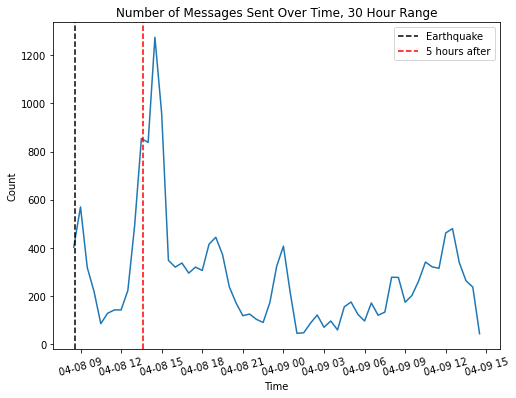

In [117]:
# Calculate the number of messages sent for entire 30 hour range, in 30min intervals
data_message_counts = data_30_hour.groupby(pd.Grouper(key="time", freq="30min")).count().reset_index()

# Plot total number of messages sent over time for 30 hours
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(data=data_message_counts, x="time", y="message")
ax.set_title("Number of Messages Sent Over Time, 30 Hour Range")
ax.set_xlabel("Time")
ax.set_ylabel("Count")
plt.xticks(rotation=15)
plt.axvline(time_of_earthquake, linestyle="--", c="black", label="Earthquake")
plt.axvline(five_after_earthquake, linestyle="--", c="red", label="5 hours after")
plt.legend() 

There is a significant amount of messages sent just after the 5 hour cutoff mark, then the number of messages decrease as the day turns to night. Then the number of messages increases during the following morning (~8:00am) up until noon, when there is another sharp decline. We may want to look into the messages during the ~2 hour period after the 5 hour cutoff, to see what was talked about during that time. As well, we may want to look at the following morning, to see how the citizens are reacting a day after the earthquake.

Now that we have an overview, let's delve deeper into our issues over the 30 hour period. We have to repeat the analysis of how to distribute road crews, sewer repair crews, power and rescue teams.

We will again start by looking at road issues (collapsed buildings, rubble, fissures, etc.) during the 30 hour time period.

downtown:
People are rushing to the one lane opened Jade Bridge. I see a traffic in its future
 I'm supposed to be getting martried this weekend. And I just heard that my church in Old Twon  has badd structure damage. I am crushed
We have one hospital that is functional right now. Roads are damage, and the situation is still critical. Stay Safe
We are tracking rumors that the famous singer Lacki Dasical is missing and possibly buried in the rubble of her hotel. KRAK TV will host a half hour special; Celebrities and Disasters.
People are downloading the Rumble App at a record pace. The City EOC team praised the willingness of people to help report damage. They are working to incorporate the information directly into the City damage arseessment system. #HateCityCan

northwest:
re: Bianca and I are wandering. Still a long road ahead.
My grandpa worked in the neighborhood that collapsed and isn't answering their phone. Tell them to call me if you see them!
Extensive damage on the north and

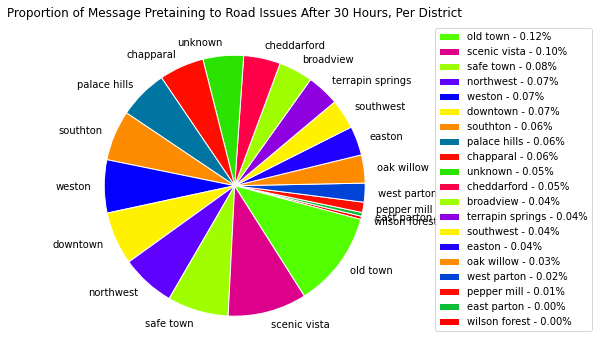

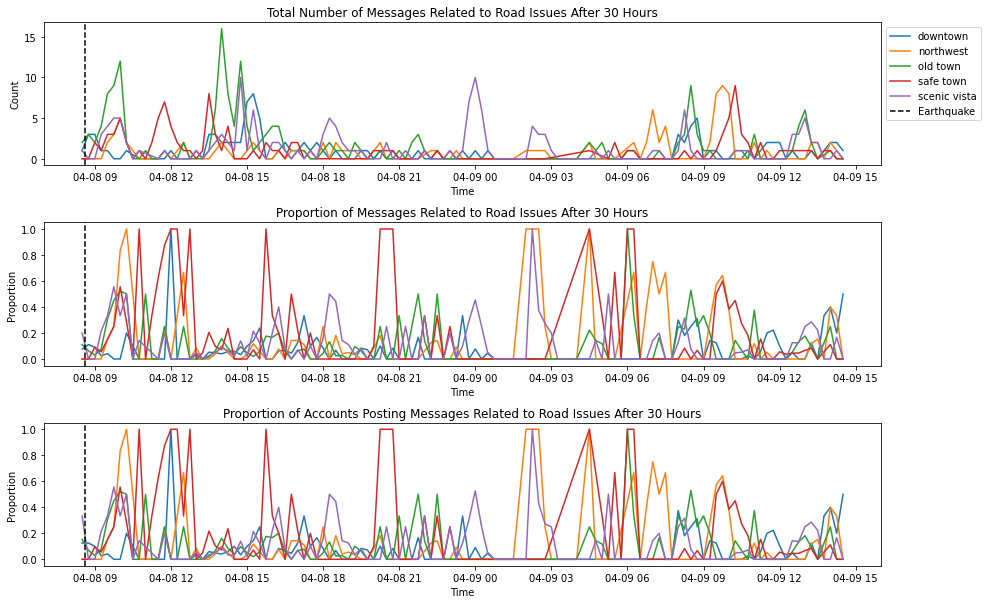

In [118]:
# Which areas need road assistance during 30 hour period after earthquake?
PlotIssueLocations(data_30_hour, data_messages_30_hour, "intended_loc", road_words, ("Road", "30"), 5, startangle=345, freq="30min")

By looking at the most reposted messages, we can see that there is a significant change during the 30 hour range. The 5 hour messages where focused on immediate threats and issues. The 30 hour messages, for the most part, aren't about immediate danger and more about the citizens trying to stabilize and survive.

There are a few areas, like Old Town and Scenic Vista, which are still heavily damaged and dangerous, as we can see from messages like: "We need help in Scenic Vista! Many collapsed houses and there are fires too!". Other than those messages, we can see that some messages are the same as they where during the first 5 hours, so maybe our data is being skewed by including those. We can create a dataframe starting after the 5 hour mark to see the difference between the two times.

Also, from the timeseries plots, we can see that there are much fewer messages after the intial 5 hours until about 24 hours after the earthquake. Taking a closer look at that 24-30 hour range may also prove useful to see what is going on a day after the earthquake.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


southton:
We are running out of critical medical supplies, hosptials are burning through IV solutions, medicines, and much more. The roads are making it difficult to supply the hospitals and trucks can't get to our warehouse to keep us supplied. Road clearing from our warehouse in 16 to hospitals should be a priority. 
anything they anyone anything trees down o on house on someone he structural integrity anything failure: problems inspections damages defects testing repair
 Never thought the night life would be "clear rubble" #stupidEarthquake #HatestupidEarthquakeWonder
re: Moderate damage. Due to concerns over contaminated water, neonatal unit patients are being transferred to other hospitals as a precaution.
Large sinkhole swallows entire pond in someone anything drill simulating earthquakes and flood disasters

downtown:
People are rushing to the one lane opened Jade Bridge. I see a traffic in its future
Chief Magistrate: Mandatory deadlines for due process are going to be missed i

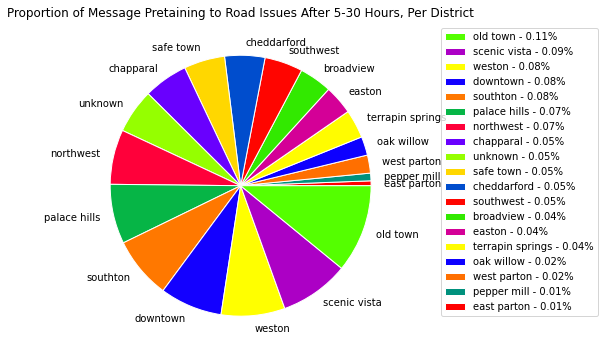

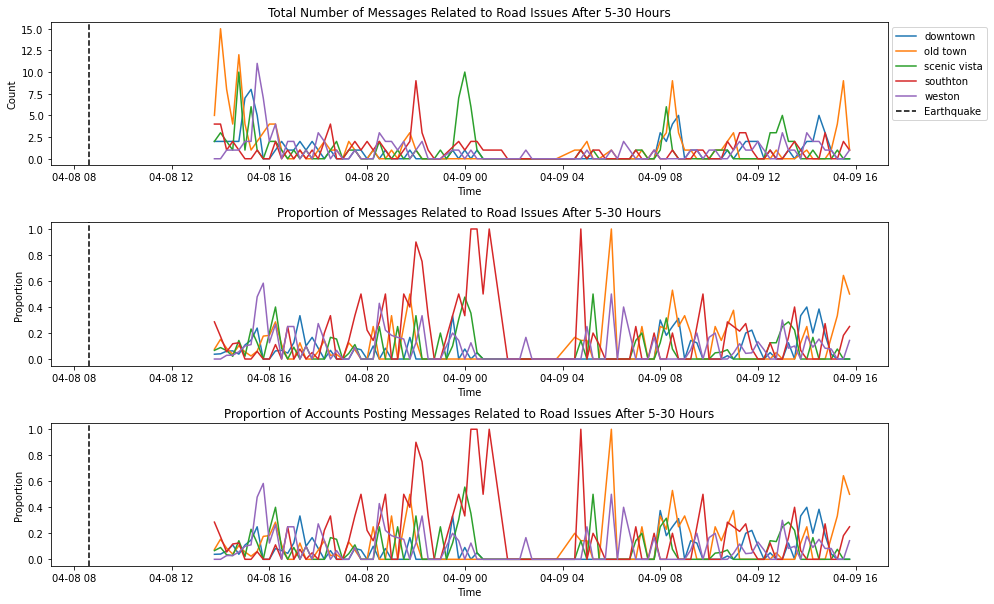

In [119]:
# See what messages are being said between 5 and 30 hours after the earthquake
data_5_to_30 = data_intended[(data_clean["time"]>=five_after_earthquake) & (data_clean["time"]<=thirty_after_earthquake)]
data_messages_5_to_30 = data_5_to_30.groupby(["message_clean", "intended_loc"], as_index=False).agg(
                          count=pd.NamedAgg(column="message", aggfunc="count"),
                          original_message=pd.NamedAgg(column="message", aggfunc="first"),
                          original_acc=pd.NamedAgg(column="account", aggfunc="first"),
                          original_loc=pd.NamedAgg(column="location", aggfunc="first"),
                          original_time=pd.NamedAgg(column="time", aggfunc="first"))

# See the most posted areas in the 5-30 hour range
PlotIssueLocations(data_5_to_30, data_messages_5_to_30, "intended_loc", road_words, ("Road", "5-30"), 5)

We can see that some neighborhoods are still heavily damaged, like Old Town and Scenic Vista, but Safe Town is no longer a priority. We also see some new neighborhoods, like Southton and Weston, are posting more messages. Old Town in particular has suffered quite a bit of damage, which is impeding resuce operations. We can also infer that the citizens have evacuated from the Northern and Southern regions, either across the bridges or to the more center regions, and particularly regions with hospitals. That means we should also shift our focus to assist in those central areas, to make sure they have the resources to provide for all the citizens. We want to clear out roads in areas that will help the most people, so clearing roads in Downtown, Weston, and Southton should become a priority. This conclusion is supported by messages such as "We are running out of critical medical supplies, hosptials are burning through IV solutions, medicines, and much more. The roads are making it difficult to supply the hospitals and trucks can't get to our warehouse to keep us supplied. Road clearing from our warehouse in 16 to hospitals should be a priority."

We can also see that the citizens are starting to worry about "everyday" activies, such as jury trials and weddings. This is demonstrated by messages such as: "Chief Magistrate: Mandatory deadlines for due process are going to be missed if we dont get the roads fixed around the courthouse and the jail in neighborhod 3. Criminals will be released if we dont get our court system back up and running!"

Overall, there should still be some help clearing out the most effected areas like Old Town and Scenic Vista, but other resources should be shifted to assisting areas that have hospitals and taken in people, such as Weston and Southton.

Next, let's see where sewer repair crews would best be utilized.

scenic vista:
Power, and now sewers?! What is the city even doing?!
Is the water we're walking through contaminated?
Flood and they someone is now in the building across the street
Roads are either flooded or crumbling to pieces!
Sewers stink right now. Both literally and figuratively.

northwest:
Sewers is our all over. What are we going to do?
Food Poisoning? Probably that contaminated water
Another entity forced to close in she as a result of the accident......who was the owner of the collapsed sewer line
Apparently part of the collapsed sewer line
Flood and they someone is now in the building just collapsed. she everyone is ok. #FTWsomeoneCan

west parton:
We are flooding! We need volunteers to move precious artifacts out of the basement. Pumps are needed too!
@TonyPeterson so sad...............hope the flooding will stop we've lost too much already
St. Himanbdrk Museum is flooding. A manbdjor wanbdter manbdin hanbds ruptured anbdnd wanbdter is canbdscanbdding into the banbdsement 

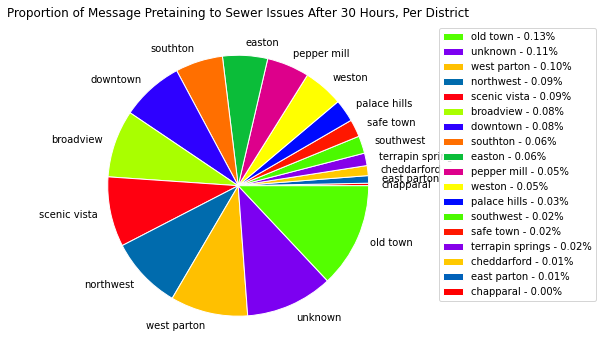

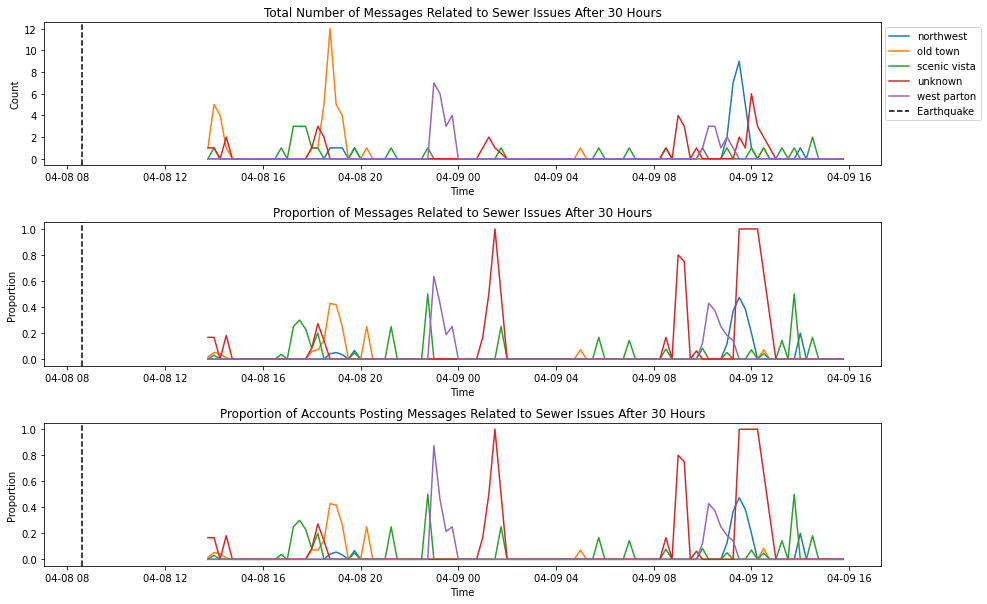

In [120]:
# Which locations need assistance from sewer repair crews after 30 hours?
PlotIssueLocations(data_5_to_30, data_messages_5_to_30, "intended_loc", sewer_words, ("Sewer", 30), 5)

We can see that there is extensive sewer damage across the entire city of St. Himark. From the time series plots, we can see that most mentions are sewer issues occur all at once, then there is a time where the issues are barely mentioned. The St. Himark Water and Sewer Department stated that there was more damage than expected and the sewers will take months to fully repair. That means we should focus our sewer repair teams on the areas that are currently flooding, and leave the larger water contamination issue to the future.

Therefor, we can see that areas like Old Town, West Parton and Scenic Vista are all areas that are currently flooding, and need immediate assistance.

Next, which districts are in need of power?

broadview:
Trying to get stocked up on power, batteries and cheese before they run out!
Our neighborhood has no power, water, and rubble everywhere from multiple collapsed and damaged buildings. We need help #Hateneighborhood
re:  Haven't been able to flush all day. At least I have power though #FTWHaventCan
Saw the power line tilted over. That would explain the power outage.
People are working on the lines! Please let there be power soon!

weston:
@FastLightJohnson Will liberals now seek to eliminate dangerous nuclear power plants are just too expensive to build. See what someone she says:
they powerlines on bus line: they it bound approaching he anyone anyone it users download the he app for more information #WinsdownloadWaste
they powerlines on bus line: they it bound approaching he anyone anyone it anything they anyone anything trees down o on house on someone he they Himark
Would you rather have a few years ago, you told me of self sufficient nuclear power plant? If there is a nuc

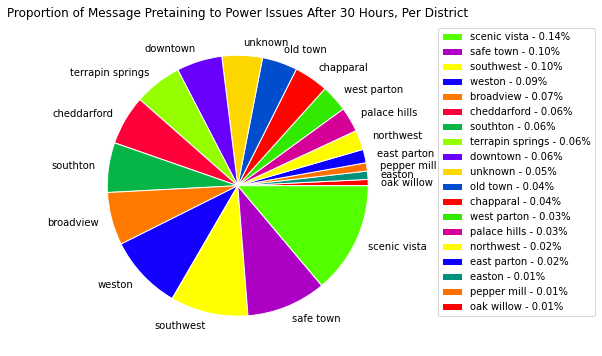

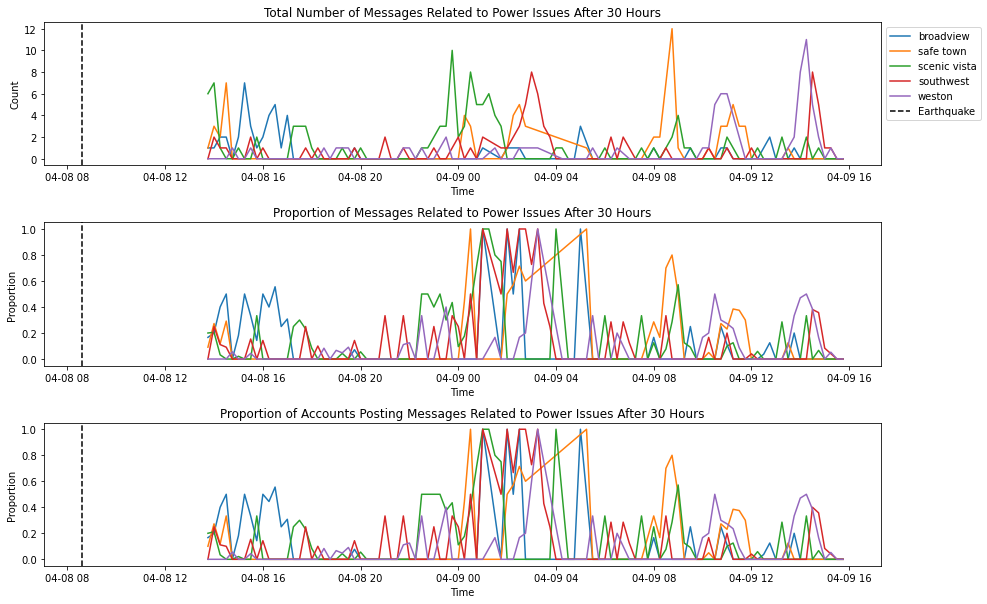

In [121]:
# Determine which locations need power during the 30 hours
PlotIssueLocations(data_5_to_30, data_messages_5_to_30, "intended_loc", power_words, ("Power", 30), 5)

The primary areas that got hit, meaning the North-Eastern and Southern Coasts, appears to still be suffering the most of the damage. Areas like Southwest and Weston, which weren't hit as hard, are now mentioning their own power issues, such as having knocked over towers and falled powerlines.

However, unlike sewers, it appears that power is being restored fairly quicly across the city. "City EOC Press Conference; Electrical power has been restored to approximately 80% of the city. Internet service is also restored to most of the city. As we have seen in other disasters, the cell system is pretty resilient. Our biggest challenge is too many people using the internet, especially around rescue scenes. Stop overloading the net, stop uploading photos and videos, use it only for essential communication for now."

One problem that we may want to look into is the people not being able to post messages because they didn't have power, or because other people were using all the internet. This would be a hard question to address with only messages, but it is still something that we should consider.

Overall, we should continue efforts of getting power restored in the most affected areas, like Old Town, as well as any remaining neighborhoods that lack power, like those seen in Southwest, Broadview and Weston.

Finally, let's look at where rescue teams could best be used.

palace hills:
Can't treat a contusions if there's piles of brick everywhere.  We need some help at the hospital.
Can't treat a broken foot if there's stuff everywhere everywhere.  We need a hospital doctor!.
manager @Bradley_TaylorFish86 said fire station was open. Got there and it was closed!
Hospital boilers are offline until tomorrow. Our neighborhood (Palace Hills) was not on the list to boil water. Is our water safe to drink?
 Aww, helpfullelpful animal friends

unknown:
Our library was ready and had prepared a wonderful place for us tyheo sleep. On everyone's cotyhe tyhehey placed a copy of tyhehe Styhe Himark Tax Code tyheo help people fall asleep quickly.
City EOC Press Conference; Electrical power has been restored to approximately 80% of the city. Internet service is also restored to most of the city. As we have seen in other disasters, the cell system is pretty resilient. Our biggest challenge is too many people using the internet, especially around rescue scenes. Stop overl

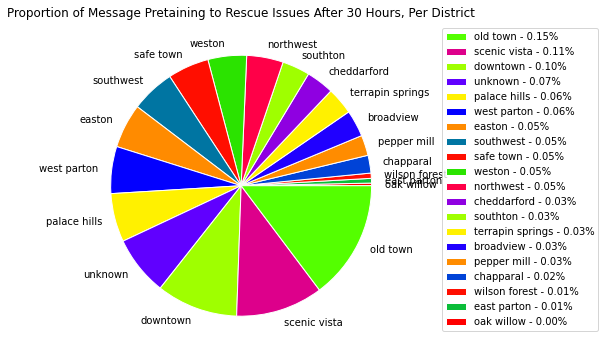

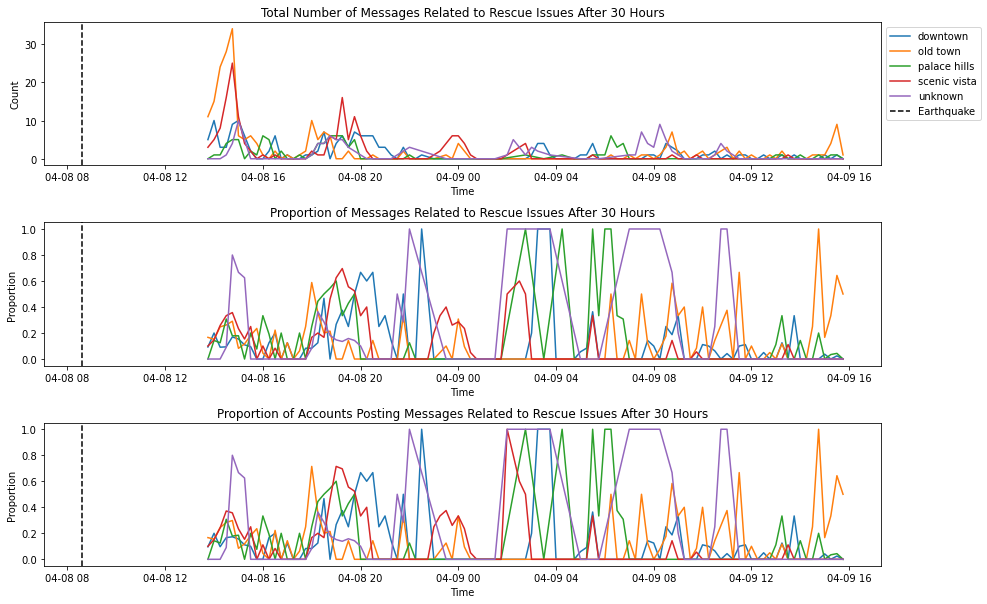

In [125]:
  # Where should we use rescue teams during 30 hour range?
PlotIssueLocations(data_5_to_30, data_messages_5_to_30, "intended_loc", rescue_words, ("Rescue", 30), 5)

Old Town and Scenic Vista are still in dire straights, and need medical assistance nearby. Similarly, Old Town's hospital is still down, so there should be medical personal nearby to assist any wounded and transport them to other available hospitals, such as the ones in Downtown.

Thankfully, the other regions are not in dire need of rescue services. After the initial damage, most locations have stabilized and are now focused on gathering resources for the citizens, as well as providing medical services to those that need them. This is also confirmed by the time series data, which shows how few messages that involve medical needs are posted over the 30 hours. There are also multiple groups of citizens that have mobilized to assist their neighbors, and mainly only need directions on where to go. It would be best to inform these citizens on places that their assitance would be useful, such as Old Town, and let them work alongside the rescue workers that are already present in those areas.

# Deep Dive

Now we want to dive into the specific events that occured throughout the city. What trends did we notice? Where there any "inflection points" where something occured would drastically change how resources are provided to the city?

In [126]:
# Create a dataframe of messages after the earthquake occured
data_after_earthquake = data_intended[data_intended["time"]>=time_of_earthquake]
data_messages_after_earthquake = data_after_earthquake.groupby(["message_clean", "intended_loc"], as_index=False).agg(
                          count=pd.NamedAgg(column="message", aggfunc="count"),
                          original_message=pd.NamedAgg(column="message", aggfunc="first"),
                          original_acc=pd.NamedAgg(column="account", aggfunc="first"),
                          original_loc=pd.NamedAgg(column="location", aggfunc="first"),
                          original_time=pd.NamedAgg(column="time", aggfunc="first"))

We can use some of our previous insights to help us in this task. In particular, we learned that the sewer system was heavily damaged, leading to the water being contaminated. This seems like an "inflection point" for the city, where the governmnet learned that it needs to start providing clean water, or ways to produce clean water, to the citizens.

Let's see when the city realized that the water was contaminated.

In [128]:
# Define words to search messages for contamination
words_contaminate = ["contaminate", "poison", "boil", "reaction", "water"]
# Create a dataframe of messages pretaining to contamination
data_contaminate = data_after_earthquake[data_after_earthquake["message_clean"].str.contains("|".join(words_contaminate))]
data_contaminate_time = data_contaminate.groupby([pd.Grouper(key="time", freq="15min")]).agg(
    count=pd.NamedAgg(column="message_clean", aggfunc="count")).reset_index()

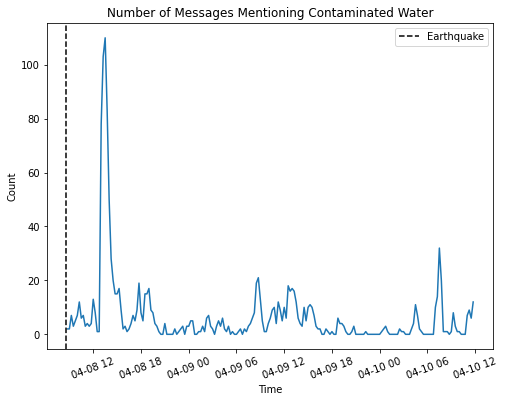

In [129]:
# Plot the number of contaminated messages over time.
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(data=data_contaminate_time, x="time", y="count", ax=ax)
plt.axvline(x=time_of_earthquake, linestyle="--", color="black", label="Earthquake")
plt.title("Number of Messages Mentioning Contaminated Water")
plt.xlabel("Time")
plt.ylabel("Count")
plt.xticks(rotation=20)
plt.legend();

That's a signficant spike, and may be indicative of an inflection point. Let's see what kind of messages where being sent around that time.

In [130]:
# Define the exact time as the inflection point.
ip_contaminate = data_contaminate_time.sort_values("count", ascending=False).iloc[0]["time"]
print("Inflection Point for contamination occured at:", ip_contaminate)

Inflection Point for contamination occured at: 2020-04-08 13:30:00


In [131]:
# Display the most posted messages around the contamination ip
data_messages_contaminate = data_contaminate.groupby(["message_clean", "intended_loc"], as_index=False).agg(
                          count=pd.NamedAgg(column="message", aggfunc="count"),
                          original_message=pd.NamedAgg(column="message", aggfunc="first"),
                          original_acc=pd.NamedAgg(column="account", aggfunc="first"),
                          original_loc=pd.NamedAgg(column="location", aggfunc="first"),
                          original_time=pd.NamedAgg(column="time", aggfunc="first"))
data_around_ip_contaminate = data_messages_contaminate[(data_messages_contaminate["original_time"]>=(ip_contaminate+pd.Timedelta("-1 hour")))\
                                                       & (data_messages_contaminate["original_time"]<=(ip_contaminate+pd.Timedelta("1 hour")))]\
                                                       .sort_values("count", ascending=False)

for message in data_around_ip_contaminate["original_message"].unique()[:5]:
  print(message)

re: Trying to get stocked up on diapers, potable water and super famous fast foods before they run out!
Department of Health and the St Himark Water and Sewer Department: Broken water and sewer pipes create of risk of contaminated drinking water. The following neighborhoods should boil their water: 4, 8,9,10,14.
clean water babeyyyyyyy
Water is contaminated. Serious reactions reported in the following neighborhoods Old Town,Safe Town,Scenic Vista,Broadview,Chapparal
 @ChloeJohnson Sow the internet got int he water from teh clouds and thats why we have to boil it? #FTWSowCan @SoLongAndThanksForAllTheWhales


From the most reposted messages, we see the following happened at this time:
- This was when the city realized that the water was contaminated. They city also alerted the citizens.
- The city warned that the following locations were being affected: Old Town, Safe Town, Scenic Vista, Chapparal, Broadview, Easton
- Citizens started buying water, worried that stores would run out.
- People started talking about boiling water.

Now we need to figure out which neighborhoods have been effected. Thankfully, those messages provided a list of neighborhoods that have been affected. We can double check that list, as well as look if other neighborhoods have been affected that aren't named.

We will start with a proportion plot, see which areas produced the most messages about the contaminated water.

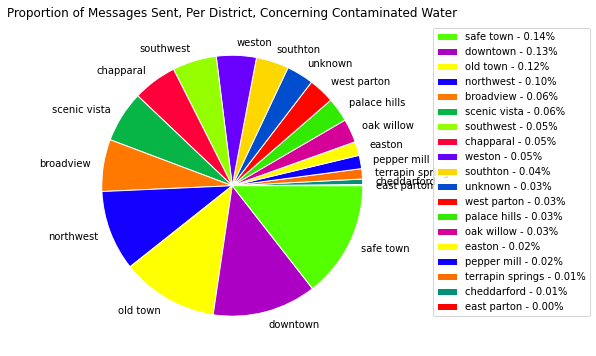

In [132]:
data_messages_contaminate_prop = data_messages_contaminate.groupby("intended_loc").agg(count=pd.NamedAgg(column="count", aggfunc=np.sum)).sort_values("count").reset_index()
data_messages_contaminate_prop["prop"] = data_messages_contaminate_prop["count"] / np.sum(data_messages_contaminate_prop["count"])

PlotPieForMsgProps(data_messages_contaminate_prop, "intended_loc", "Proportion of Messages Sent, Per District, Concerning Contaminated Water")

In [133]:
PrintMostRepostedInLocs(5, data_messages_contaminate, "intended_loc", ["safe town", "downtown", "old town", "northwest", "broadview"], words_contaminate)

safe town:
re: The incoming aircraft were delivered to someone from the Darwin-based 1st something anything anything anyone has also directed principal secretary, food and water towers to help negotiate with host families or in rented apartments.
Department of Health and the St Himark Water and Sewer Department: Broken water and sewer pipes create of risk of contaminated drinking water. The following neighborhoods should boil their water: 4, 8,9,10,14.
finally got some food and bottled water, thanks @AlwaysSafePowerCompany!
Thank you Federal Disaster Response Team for arseisting our neighborhoods in this trying time! We at Always Safe Power Company are also expanding our efforts as much as possible to arseist our neighbors. Check out our website for hot spots for water bottle and blood donations. #alwayssafe
People need water, food and electricity. #FTWandWaste

downtown:
re: After the generators powering something water and sea to hospitals on mainland they following the installation 

We can see that this is a widespread issue, affecting essentially every neighborhood. There are reports of contaminated water in every district, and many messages from multiple government departments informing *everyone* to boil their water.

Finally, to be sure that this is an inflection point, let's look at what words were being said before and after the time. To do that, we can use word clouds!

In [134]:
def PlotIPWordCloud(df, ip, title_before, title_after, time_before="-1 hour", time_after="1 hour"):
  '''
  Function to plot 2 Word Clouds, 1 for messages before some time, 1 for messages after

  Input:
    - df: DataFrame of individual messages. Contains the columns:
      - message_clean: The cleaned version of a string message.
      - time: Pandas datetime time for when the mesasge was posted.
    - ip: Pandas Datetime for the "inflection point." This is the time that 
        divides the data.
    - title_before: String title of the wordcloud for before the ip.
    - title_after: String title of the wordcloud for after the ip.
    - time_before: Optional String. Specifies amount of time before ip to
        gather messages from.
    - time_after: Optional String. Specifies amount of time after ip to
        gather messages from.
  '''
  # Get messages before and after inflection point
  data_before_ip = df[(df["time"]>=(ip_contaminate+pd.Timedelta(time_before))) & (df["time"]<=ip_contaminate)]
  data_after_ip = df[(df["time"]>=ip_contaminate) & (df["time"]<=(ip_contaminate+pd.Timedelta(time_after)))]

  fig, ax = plt.subplots(1, 2, figsize=(12, 6))
  # Plot wordcloud for words before ip
  text_before = " ".join(msg for msg in data_before_ip["message_clean"])
  wordcloud_before = WordCloud(max_words=25, background_color="white").generate(text_before)
  ax[0].imshow(wordcloud_before, interpolation="bilinear")
  ax[0].set_title(title_before)
  ax[0].axis("off")

  # Plot wordcloud for words after ip
  text_after = " ".join(msg for msg in data_after_ip["message_clean"])
  wordcloud_after = WordCloud(max_words=25, background_color="white").generate(text_after)
  ax[1].imshow(wordcloud_after, interpolation="bilinear")
  ax[1].set_title(title_after)
  ax[1].axis("off")

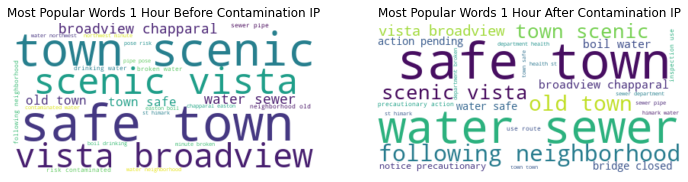

In [135]:
# Create a word cloud for the contaminated water inflection point
PlotIPWordCloud(data_after_earthquake, 
                ip_contaminate, 
                "Most Popular Words 1 Hour Before Contamination IP",
                "Most Popular Words 1 Hour After Contamination IP")

The word cloud isn't perfect but it shows that, after the inflection point, messages mentioning the water and sewer system occur more frequently than before the inflection point.

From our analysis, we can conclude that an inflection point occured at 13:30 on 2020-04-08. Before this incident, the neighborhoods were focused on the imminent threat of the earthquake, but afterwards became aware of the pending problems with the sewers and water contamination. This problem affected all of the neighborhoods, and would require a large shift in the distribution of resources. The city should focus on providing information to everyone about the contamination, bottled water to as many citizens as it can, and any utilizies that would be advantageous in cleaning/boiling the unsanitary waters.

Let's look for other inflection points. Another prospect that we can look into is shelter, and providing food to the citizens. That is, after the initial shock of the earthquake, citizens would need a place to sleep for the night, as well as have supplies like food. Let's see if there is a specific time when the town shifts its priorities to shelter.

### Extra Ideas

Ideas

- Where are people staying?
- How many people had their building collapse?
- Number of thefts and amount of looting?
- What is the general "emotion" of the populace?
- How much do they trust their government right now?
- What about the mayor?
- Citizen rescue teams and HSS (no idea what the acronym means)?

# Sentiment analysis

In [136]:
# "Calculate" sentiment for each message
data_sentiment = data_intended.copy()
data_sentiment = data_sentiment[data_sentiment["time"]>=(time_of_earthquake+pd.Timedelta("-2 hours"))]
data_sentiment["sentiment_score"] = data_sentiment["message_clean"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

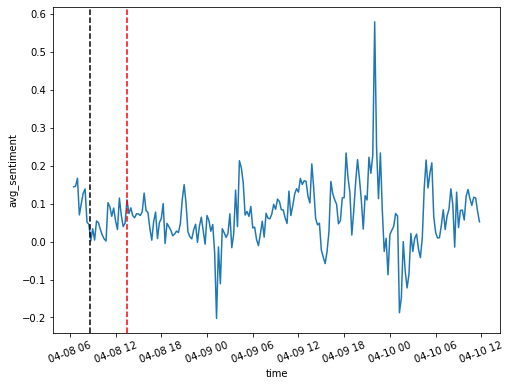

In [137]:
# Plot the sentiment over time
data_sentiment_time = data_sentiment.groupby(pd.Grouper(key="time", freq="15min")).agg(
    avg_sentiment=pd.NamedAgg(column="sentiment_score", aggfunc=np.mean)).reset_index()

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.lineplot(data=data_sentiment_time, x="time", y="avg_sentiment", ax=ax)
plt.axvline(x=time_of_earthquake, linestyle="--", c="black", label="Earthquake")
plt.axvline(x=ip_contaminate, linestyle="--", c="red", label="Inflection Point: Contaminate")
plt.xticks(rotation=20);

# Did the citizens move locations?

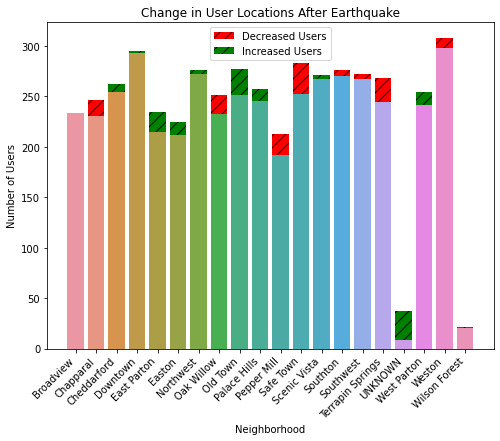

In [138]:
# Calculate the population of each before the earthquake
data_before_earthquake = data_intended[data_intended["time"]<time_of_earthquake]
data_before_earthquake_pops = data_before_earthquake.groupby("location", as_index=False).agg(
    before_pop=pd.NamedAgg(column="account", aggfunc=pd.Series.nunique))

# Calculate hte population of each a day after the earthquake
data_after_pop = data_after_earthquake.groupby("account", as_index=False)\
  .agg(location=pd.NamedAgg(column="location", aggfunc="last"))\
  .groupby("location", as_index=False)\
  .agg(after_pop=pd.NamedAgg(column="account", aggfunc=pd.Series.nunique))
data_after_pop = data_after_pop.merge(data_before_earthquake_pops, how="left", on="location")

# Find the minimum population between before and after the earthquake for each district
locs = data_before_earthquake_pops["location"]
bottom_of_change = np.minimum(data_after_pop["before_pop"], data_after_pop["after_pop"])
height_of_change = np.abs(data_after_pop["after_pop"] - data_after_pop["before_pop"])

# Choose colors the "moved" population.
# If after < before, is red. Else is green.
hatch_colors = ["red" if lost_pop else "green" for lost_pop in (data_after_pop["before_pop"] >= data_after_pop["after_pop"])]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(data=data_before_earthquake_pops, x="location", y="before_pop", ax=ax)
for index, loc in enumerate(locs):
  # Only add 2 colors to legend
  if index==0:
    ax.bar(loc, height=height_of_change[index], bottom=bottom_of_change[index], hatch="//", facecolor=hatch_colors[index], label="Decreased Users")
  elif index==2:
    ax.bar(loc, height=height_of_change[index], bottom=bottom_of_change[index], hatch="//", facecolor=hatch_colors[index], label="Increased Users")
  else:
    ax.bar(loc, height=height_of_change[index], bottom=bottom_of_change[index], hatch="//", facecolor=hatch_colors[index])
ax.set_xlabel("Neighborhood")
ax.set_ylabel("Number of Users")
ax.set_title("Change in User Locations After Earthquake")
plt.xticks(rotation=45, ha="right")
plt.legend();

# Shelter

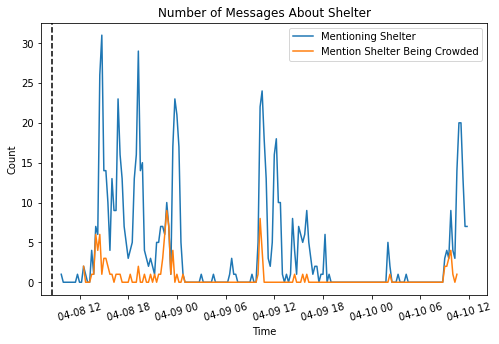

In [139]:
# See when citizens are spending time outside in parks.
shelter_words = [" shelter ", " camp ", " park ", " tent "]
shelter_full_words = ["full", "noisy", "packed", "crowded"]

# Plot the amount of times people mention each
data_shelter = data_after_earthquake[data_after_earthquake["message_clean"].str.contains("|".join(shelter_words))]
data_shelter_by_time = data_shelter.groupby(pd.Grouper(key="time", freq="15min")).count().reset_index()

data_shelter_crowded = data_after_earthquake[(data_after_earthquake["message_clean"].str.contains("|".join(shelter_words))) &\
                                           (data_after_earthquake["message_clean"].str.contains("|".join(shelter_full_words)))]
data_shelter_crowded_by_time = data_shelter_crowded.groupby(pd.Grouper(key="time", freq="15min")).count().reset_index()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.lineplot(data=data_shelter_by_time, x="time", y="message", label="Mentioning Shelter", ax=ax)
sns.lineplot(data=data_shelter_crowded_by_time, x="time", y="message", label="Mention Shelter Being Crowded", ax=ax)
ax.set_title("Number of Messages About Shelter")
ax.set_xlabel("Time")
ax.set_ylabel("Count")
plt.xticks(rotation=15)
plt.axvline(time_of_earthquake, linestyle="--", c="black", label="Earthquake");

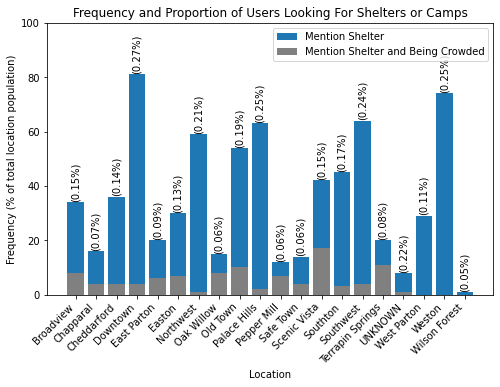

In [140]:
# Plot the number and percentage of users that mention "shelter"

# Number of accounts mentioning shelter
data_shelter_pop = data_shelter.groupby("location", as_index=False).agg(num_shelter=pd.NamedAgg(column="account", aggfunc=pd.Series.nunique))
# Find the number of unique accounts after earthquake
data_shelter_pop["prop_shelter"] = data_shelter_pop["num_shelter"] / data_after_pop["after_pop"]

plt.figure(figsize=(8, 5))
fig = plt.bar(data_shelter_pop["location"], height=data_shelter_pop["num_shelter"], label="Mention Shelter")
plt.title("Frequency and Proportion of Users Looking For Shelters or Camps")
plt.xlabel("Location")
plt.ylabel("Frequency (% of total location population)")
plt.xticks(rotation=45, ha="right")
ax = plt.gca()
ax.set_ylim([0, 100])

# Add a second bar for the number of people that say the shelter is full
data_shelter_pop["num_crowded"] = data_shelter_crowded.groupby("location", as_index=False).agg(num_crowded=pd.NamedAgg(column="account", aggfunc=pd.Series.nunique))["num_crowded"]

bottom_crowded = np.zeros(len(locs))
top_crowded = data_shelter_pop["num_crowded"]
ax.bar(locs, height=top_crowded, bottom=bottom_crowded, facecolor="grey", label="Mention Shelter and Being Crowded")

i = 0
for ax in fig:
  width = ax.get_width()
  height = ax.get_height()
  x, y = ax.get_xy()
  plt.text(x + width/2,
           y + height + 1,
           "({:.2f}%)".format(data_shelter_pop["prop_shelter"][i]),
           ha='center',
           rotation=90)
  i+=1

plt.legend(loc="upper right");

In [ ]:
print("Total number of people that mention shelter: {}".format(np.sum(data_shelter_pop["num_shelter"])))
print("Totel number of people that mention the shelters being crowded: {}".format(np.sum(data_shelter_pop["num_crowded"])))

Total number of people that mention shelter: 717
Totel number of people that mention the shelters being crowded: 101.0
